In [1]:
# Import the modules we'll need in this notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
from matplotlib.colors import LogNorm, SymLogNorm
import glob

%matplotlib inline
plt.style.use('seaborn-notebook')

# Ignore annoying astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# For including units on plots below with astropy Quantity objects
from astropy.visualization import quantity_support
quantity_support(); 

In [2]:
# datadir = "Sampledata/spectroscopy/"
sciencedir = 'science/'
calibrationdir = sciencedir + 'calibrated/'

arcfile = 'wavelength_calibration/NeAr/test.0011.fits'
arc = fits.getdata(arcfile)

arcfile2 = 'wavelength_calibration/NeAr/ccds4.0009.fits'
arc2 = fits.getdata(arcfile2)

calibrated_science_files = glob.glob("science/calibrated/"+'*.fits')
calibrated_science_data = [fits.getdata(s) for s in calibrated_science_files]

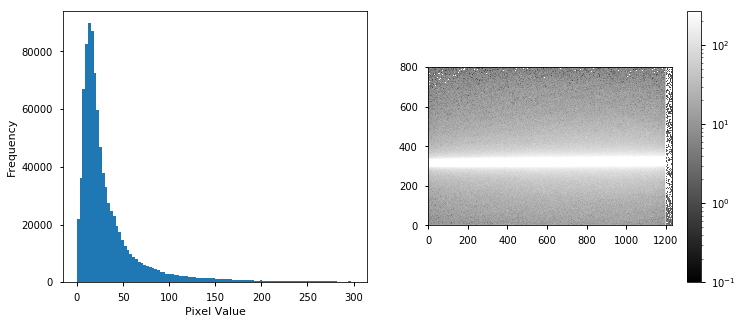

In [3]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
hist = ax1.hist(calibrated_science_data[8].flatten(), bins=100, range=(0,300))
ax1.set_xlabel("Pixel Value")
ax1.set_ylabel("Frequency")
img = plt.imshow(calibrated_science_data[8], cmap='gray', norm=LogNorm(), vmin=0.1, vmax=275, origin='lower')#, cmap=plt.get_cmap('gray'))
plt.colorbar()

## Spectroscopy-specific Corrections

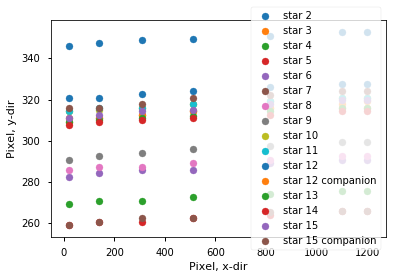

In [4]:
curvecorrect_top_star2 = [(1199,327.6),(1101,327.6),(815.6,325.9),
                          (511.9,324.2),(311.6,322.6),(141.4,320.9),(22.9,320.9)]
x_top_star2, y_top_star2 = zip(*curvecorrect_top_star2)
plt.scatter(x_top_star2, y_top_star2, label='star 2')

curvecorrect_top_star3 = [(1199,319.2),(1101,317.6),(815.6,315.9),
                          (511.9,314.2),(311.6,312.6),(141.4,310.9),(22.9,309.2)]
x_top_star3, y_top_star3 = zip(*curvecorrect_top_star3)
plt.scatter(x_top_star3, y_top_star3, label='star 3')

curvecorrect_top_star4 = [(1199,275.8),(1101,275.8),(815.6,274.2),
                          (511.9,272.5),(311.6,270.8),(141.4,270.8),(22.9,269.2)]
x_top_star4, y_top_star4 = zip(*curvecorrect_top_star4)
plt.scatter(x_top_star4, y_top_star4, label='star 4')

curvecorrect_top_star5 = [(1199,265.8),(1101,265.8),(815.6,264.2),
                          (511.9,262.5),(311.6,260.8),(141.4,260.8),(22.9,259.2)]
x_top_star5, y_top_star5 = zip(*curvecorrect_top_star5)
plt.scatter(x_top_star5, y_top_star5, label='star 5')

curvecorrect_top_star6 = [(1199,290.9),(1101,290.9),(815.6,289.2),
                          (511.9,285.9),(311.6,285.9),(141.4,284.2),(22.9,282.5)]
x_top_star6, y_top_star6 = zip(*curvecorrect_top_star6)
plt.scatter(x_top_star6, y_top_star6, label='star 6')

curvecorrect_top_star7 = [(1199,265.8),(1101,265.8),(815.6,265.5),
                          (511.9,262.5),(311.6,262.5),(141.4,260.8),(22.9,259.2)]
x_top_star7, y_top_star7 = zip(*curvecorrect_top_star7)
plt.scatter(x_top_star7, y_top_star7, label='star 7')

curvecorrect_top_star8 = [(1199,292.5),(1101,292.5),(815.6,290.9),
                          (511.9,289.1),(311.6,287.5),(141.4,287.5),(22.9,285.9)]
x_top_star8, y_top_star8 = zip(*curvecorrect_top_star8)
plt.scatter(x_top_star8, y_top_star8, label='star 8')

curvecorrect_top_star9 = [(1199,299.2),(1101,299.2),(815.6,297.5),
                          (511.9,295.9),(311.6,294.2),(141.4,292.5),(22.9,290.9)]
x_top_star9, y_top_star9 = zip(*curvecorrect_top_star9)
plt.scatter(x_top_star9, y_top_star9, label='star 9')

curvecorrect_top_star10 = [(1199,320.9),(1101,320.9),(815.6,319.2),
                          (511.9,317.6),(311.6,315.9),(141.4,315),(22.9,314.2)]
x_top_star10, y_top_star10 = zip(*curvecorrect_top_star10)
plt.scatter(x_top_star10, y_top_star10, label='star 10')

curvecorrect_top_star11 = [(1199,320.9),(1101,320.9),(815.6,319.2),
                          (511.9,317.6),(311.6,316),(141.4,315.9),(22.9,314.2)]
x_top_star11, y_top_star11 = zip(*curvecorrect_top_star11)
plt.scatter(x_top_star11, y_top_star11, label='star 11')

curvecorrect_top_star12 = [(1199,352.6),(1101,352.6),(815.6,350.9),
                          (511.9,349.3),(311.6,349),(141.4,347.6),(22.9,345.9)]
x_top_star12, y_top_star12 = zip(*curvecorrect_top_star12)
plt.scatter(x_top_star12, y_top_star12, label='star 12')

curvecorrect_top_star12_companion = [(1199,315.9),(1101,315.9),(815.6,315.9),
                          (511.9,314.2),(311.6,312.6),(141.4,311),(22.9,310.9)]
x_top_star12_companion, y_top_star12_companion = zip(*curvecorrect_top_star12_companion)
plt.scatter(x_top_star12_companion, y_top_star12_companion, label='star 12 companion')

curvecorrect_top_star13 = [(1199,315.9),(1101,315.9),(815.6,314.2),
                          (511.9,312),(311.6,310.9),(141.4,310),(22.9,309)]
x_top_star13, y_top_star13 = zip(*curvecorrect_top_star13)
plt.scatter(x_top_star13, y_top_star13, label='star 13')

curvecorrect_top_star14 = [(1199,314.2),(1101,314.2),(815.6,312.6),
                          (511.9,310.9),(311.6,310),(141.4,309),(22.9,307.6)]
x_top_star14, y_top_star14 = zip(*curvecorrect_top_star14)
plt.scatter(x_top_star14, y_top_star14, label='star 14')

curvecorrect_top_star15 = [(1199,320),(1101,320),(815.6,317.6),
                          (511.9,315),(311.6,314.2),(141.4,312.6),(22.9,310.9)]
x_top_star15, y_top_star15 = zip(*curvecorrect_top_star15)
plt.scatter(x_top_star15, y_top_star15, label='star 15')

curvecorrect_top_star15_companion = [(1199,324.2),(1101,324.2),(815.6,322),
                          (511.9,320.7),(311.6,317.7),(141.4,316),(22.9,315.9)]
x_top_star15_companion, y_top_star15_companion = zip(*curvecorrect_top_star15_companion)
plt.scatter(x_top_star15_companion, y_top_star15_companion, label='star 15 companion')
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend(loc=7)
plt.show()



## Star 2

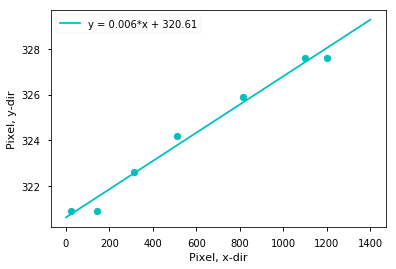

Text(0, 0.5, 'Counts')

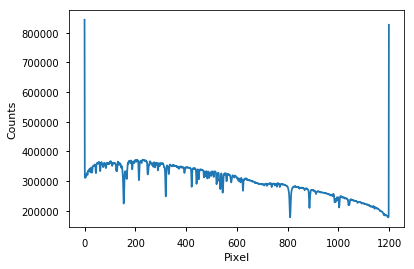

In [5]:
# Fit a line to our (X,Y) data
def linear_fit(x, *params):
    m, b = params
    return m*x + b

init = [1.0, 300.]
coeff_star2, covar_star2 = curve_fit(linear_fit, x_top_star2, y_top_star2, p0=init)
x_fit_star2 = np.linspace(0,1400,1000)
y_fit_star2 = linear_fit(x_fit_star2, *coeff_star2)
label_str_star2 = "y = %.3f*x + %.2f" % (coeff_star2[0], coeff_star2[1])

plt.scatter(x_top_star2, y_top_star2, color='c')
plt.plot(x_fit_star2, y_fit_star2, color='c', label=label_str_star2)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star2 = np.floor(linear_fit(x_pix, coeff_star2[0], coeff_star2[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star2 = y_pix_star2 - 0
target_lower_star2 = y_pix_star2 - 13
sky_upper_star2 = y_pix_star2 + 50
sky_lower_star2 = y_pix_star2 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star2 = np.asarray(
            [calibrated_science_data[8].T[i, target_lower_star2[i]:target_upper_star2[i]] 
             for i in range(1200)]
           ).T

sky_star2 = np.asarray(
         [calibrated_science_data[8].T[i, sky_lower_star2[i]:sky_upper_star2[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star2 = np.median(sky_star2, axis=0)
target_skysub_star2 = target_star2 - column_medians_star2

target_skysub_1d_star2 = np.sum(target_skysub_star2, axis=0)
target_skysub_1d_star2 = target_skysub_1d_star2[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star2)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 3

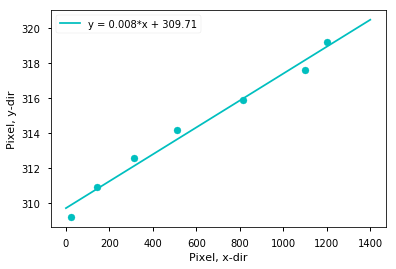

Text(0, 0.5, 'Counts')

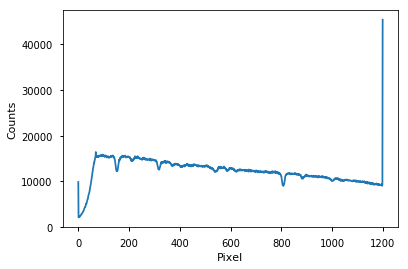

In [6]:
init = [1.0, 300.]
coeff_star3, covar_star3 = curve_fit(linear_fit, x_top_star3, y_top_star3, p0=init)
x_fit_star3 = np.linspace(0,1400,1000)
y_fit_star3 = linear_fit(x_fit_star3, *coeff_star3)
label_str_star3 = "y = %.3f*x + %.2f" % (coeff_star3[0], coeff_star3[1])

plt.scatter(x_top_star3, y_top_star3, color='c')
plt.plot(x_fit_star3, y_fit_star3, color='c', label=label_str_star3)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star3 = np.floor(linear_fit(x_pix, coeff_star3[0], coeff_star3[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star3 = y_pix_star3 - 1
target_lower_star3 = y_pix_star3 - 12
sky_upper_star3 = y_pix_star3 + 50
sky_lower_star3 = y_pix_star3 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star3 = np.asarray(
            [calibrated_science_data[9].T[i, target_lower_star3[i]:target_upper_star3[i]] 
             for i in range(1200)]
           ).T

sky_star3 = np.asarray(
         [calibrated_science_data[9].T[i, sky_lower_star3[i]:sky_upper_star3[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star3 = np.median(sky_star3, axis=0)
target_skysub_star3 = target_star3 - column_medians_star3

target_skysub_1d_star3 = np.sum(target_skysub_star3, axis=0)
target_skysub_1d_star3 = target_skysub_1d_star3[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star3)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 4

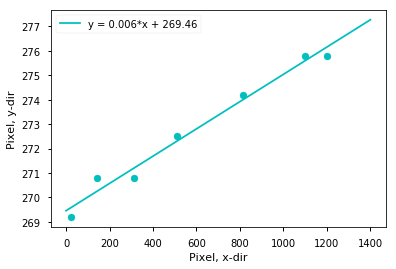

Text(0, 0.5, 'Counts')

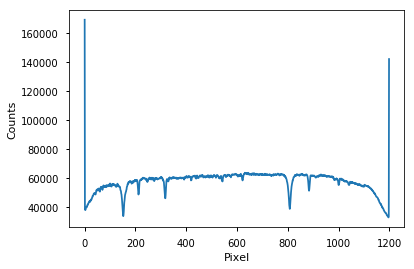

In [7]:
init = [1.0, 300.]
coeff_star4, covar_star4 = curve_fit(linear_fit, x_top_star4, y_top_star4, p0=init)
x_fit_star4 = np.linspace(0,1400,1000)
y_fit_star4 = linear_fit(x_fit_star4, *coeff_star4)
label_str_star4 = "y = %.3f*x + %.2f" % (coeff_star4[0], coeff_star4[1])

plt.scatter(x_top_star4, y_top_star4, color='c')
plt.plot(x_fit_star4, y_fit_star4, color='c', label=label_str_star4)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star4 = np.floor(linear_fit(x_pix, coeff_star4[0], coeff_star4[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star4 = y_pix_star4 - 1
target_lower_star4 = y_pix_star4 - 7
sky_upper_star4 = y_pix_star4 + 50
sky_lower_star4 = y_pix_star4 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star4 = np.asarray(
            [calibrated_science_data[10].T[i, target_lower_star4[i]:target_upper_star4[i]] 
             for i in range(1200)]
           ).T

sky_star4 = np.asarray(
         [calibrated_science_data[10].T[i, sky_lower_star4[i]:sky_upper_star4[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star4 = np.median(sky_star4, axis=0)
target_skysub_star4 = target_star4 - column_medians_star4

target_skysub_1d_star4 = np.sum(target_skysub_star4, axis=0)
target_skysub_1d_star4 = target_skysub_1d_star4[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star4)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 5

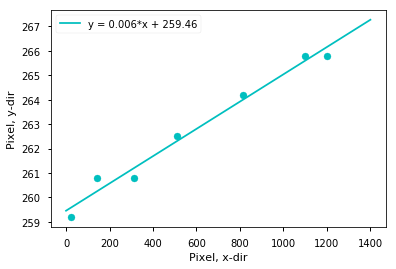

Text(0, 0.5, 'Counts')

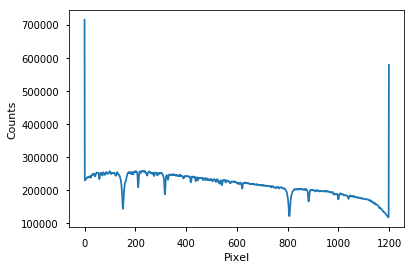

In [8]:
init = [1.0, 300.]
coeff_star5, covar_star5 = curve_fit(linear_fit, x_top_star5, y_top_star5, p0=init)
x_fit_star5 = np.linspace(0,1400,1000)
y_fit_star5 = linear_fit(x_fit_star5, *coeff_star5)
label_str_star5 = "y = %.3f*x + %.2f" % (coeff_star5[0], coeff_star5[1])

plt.scatter(x_top_star5, y_top_star5, color='c')
plt.plot(x_fit_star5, y_fit_star5, color='c', label=label_str_star5)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star5 = np.floor(linear_fit(x_pix, coeff_star5[0], coeff_star5[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star5 = y_pix_star5 - 1
target_lower_star5 = y_pix_star5 - 12
sky_upper_star5 = y_pix_star5 + 50
sky_lower_star5 = y_pix_star5 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star5 = np.asarray(
            [calibrated_science_data[11].T[i, target_lower_star5[i]:target_upper_star5[i]] 
             for i in range(1200)]
           ).T

sky_star5 = np.asarray(
         [calibrated_science_data[11].T[i, sky_lower_star5[i]:sky_upper_star5[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star5 = np.median(sky_star5, axis=0)
target_skysub_star5 = target_star5 - column_medians_star5

target_skysub_1d_star5 = np.sum(target_skysub_star5, axis=0)
target_skysub_1d_star5 = target_skysub_1d_star5[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star5)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 6

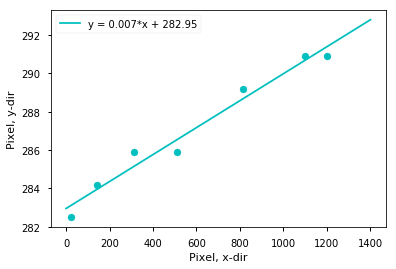

Text(0, 0.5, 'Counts')

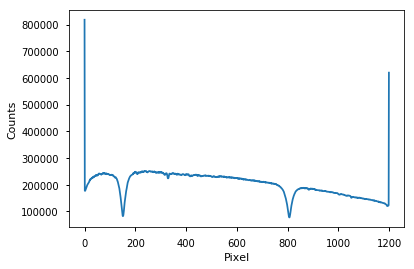

In [9]:
init = [1.0, 300.]
coeff_star6, covar_star6 = curve_fit(linear_fit, x_top_star6, y_top_star6, p0=init)
x_fit_star6 = np.linspace(0,1400,1000)
y_fit_star6 = linear_fit(x_fit_star6, *coeff_star6)
label_str_star6 = "y = %.3f*x + %.2f" % (coeff_star6[0], coeff_star6[1])

plt.scatter(x_top_star6, y_top_star6, color='c')
plt.plot(x_fit_star6, y_fit_star6, color='c', label=label_str_star6)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star6 = np.floor(linear_fit(x_pix, coeff_star6[0], coeff_star6[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star6 = y_pix_star6 - 1
target_lower_star6 = y_pix_star6 - 14
sky_upper_star6 = y_pix_star6 + 50
sky_lower_star6 = y_pix_star6 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star6 = np.asarray(
            [calibrated_science_data[12].T[i, target_lower_star6[i]:target_upper_star6[i]] 
             for i in range(1200)]
           ).T

sky_star6 = np.asarray(
         [calibrated_science_data[12].T[i, sky_lower_star6[i]:sky_upper_star6[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star6 = np.median(sky_star6, axis=0)
target_skysub_star6 = target_star6 - column_medians_star6

target_skysub_1d_star6 = np.sum(target_skysub_star6, axis=0)
target_skysub_1d_star6 = target_skysub_1d_star6[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star6)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 7

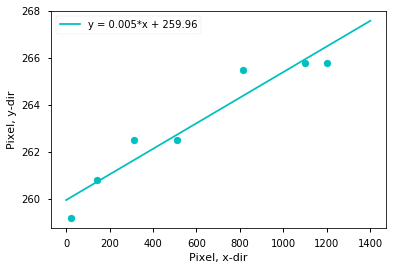

Text(0, 0.5, 'Counts')

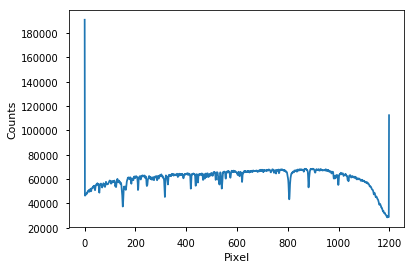

In [10]:
init = [1.0, 300.]
coeff_star7, covar_star7 = curve_fit(linear_fit, x_top_star7, y_top_star7, p0=init)
x_fit_star7 = np.linspace(0,1400,1000)
y_fit_star7 = linear_fit(x_fit_star7, *coeff_star7)
label_str_star7 = "y = %.3f*x + %.2f" % (coeff_star7[0], coeff_star7[1])

plt.scatter(x_top_star7, y_top_star7, color='c')
plt.plot(x_fit_star7, y_fit_star7, color='c', label=label_str_star7)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star7 = np.floor(linear_fit(x_pix, coeff_star7[0], coeff_star7[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star7 = y_pix_star7 - 1
target_lower_star7 = y_pix_star7 - 5
sky_upper_star7 = y_pix_star7 + 50
sky_lower_star7 = y_pix_star7 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star7 = np.asarray(
            [calibrated_science_data[13].T[i, target_lower_star7[i]:target_upper_star7[i]] 
             for i in range(1200)]
           ).T

sky_star7 = np.asarray(
         [calibrated_science_data[13].T[i, sky_lower_star7[i]:sky_upper_star7[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star7 = np.median(sky_star7, axis=0)
target_skysub_star7 = target_star7 - column_medians_star7

target_skysub_1d_star7 = np.sum(target_skysub_star7, axis=0)
target_skysub_1d_star7 = target_skysub_1d_star7[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star7)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 8

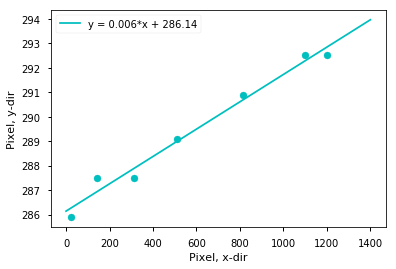

Text(0, 0.5, 'Counts')

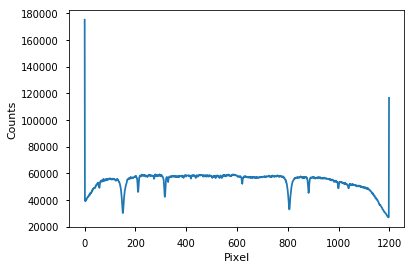

In [11]:
init = [1.0, 300.]
coeff_star8, covar_star8 = curve_fit(linear_fit, x_top_star8, y_top_star8, p0=init)
x_fit_star8 = np.linspace(0,1400,1000)
y_fit_star8 = linear_fit(x_fit_star8, *coeff_star8)
label_str_star8 = "y = %.3f*x + %.2f" % (coeff_star8[0], coeff_star8[1])

plt.scatter(x_top_star8, y_top_star8, color='c')
plt.plot(x_fit_star8, y_fit_star8, color='c', label=label_str_star8)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star8 = np.floor(linear_fit(x_pix, coeff_star8[0], coeff_star8[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star8 = y_pix_star8- 0
target_lower_star8 = y_pix_star8 - 7
sky_upper_star8 = y_pix_star8 + 50
sky_lower_star8 = y_pix_star8 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star8 = np.asarray(
            [calibrated_science_data[14].T[i, target_lower_star8[i]:target_upper_star8[i]] 
             for i in range(1200)]
           ).T

sky_star8 = np.asarray(
         [calibrated_science_data[14].T[i, sky_lower_star8[i]:sky_upper_star8[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star8 = np.median(sky_star8, axis=0)
target_skysub_star8 = target_star8 - column_medians_star8

target_skysub_1d_star8 = np.sum(target_skysub_star8, axis=0)
target_skysub_1d_star8 = target_skysub_1d_star8[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star8)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 9

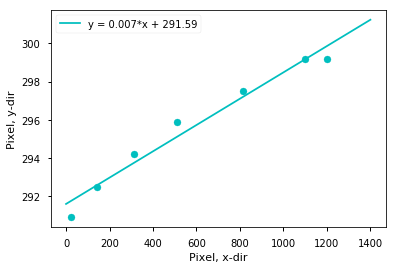

Text(0, 0.5, 'Counts')

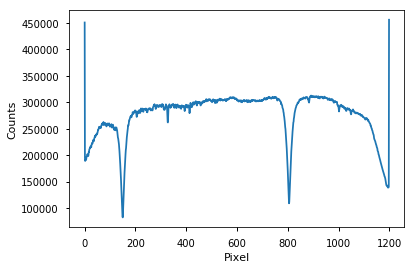

In [12]:
init = [1.0, 300.]
coeff_star9, covar_star9 = curve_fit(linear_fit, x_top_star9, y_top_star9, p0=init)
x_fit_star9 = np.linspace(0,1400,1000)
y_fit_star9 = linear_fit(x_fit_star9, *coeff_star9)
label_str_star9 = "y = %.3f*x + %.2f" % (coeff_star9[0], coeff_star9[1])

plt.scatter(x_top_star9, y_top_star9, color='c')
plt.plot(x_fit_star9, y_fit_star9, color='c', label=label_str_star9)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star9 = np.floor(linear_fit(x_pix, coeff_star9[0], coeff_star9[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star9 = y_pix_star9 - 1
target_lower_star9 = y_pix_star9 - 8
sky_upper_star9 = y_pix_star9 + 50
sky_lower_star9 = y_pix_star9 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star9 = np.asarray(
            [calibrated_science_data[15].T[i, target_lower_star9[i]:target_upper_star9[i]] 
             for i in range(1200)]
           ).T

sky_star9 = np.asarray(
         [calibrated_science_data[15].T[i, sky_lower_star9[i]:sky_upper_star9[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star9 = np.median(sky_star9, axis=0)
target_skysub_star9 = target_star9 - column_medians_star9

target_skysub_1d_star9 = np.sum(target_skysub_star9, axis=0)
target_skysub_1d_star9 = target_skysub_1d_star9[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star9)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 10

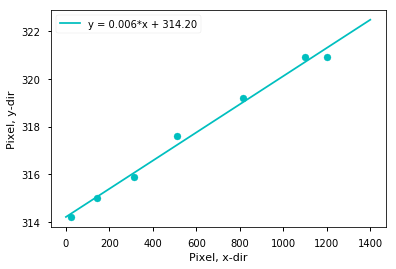

Text(0, 0.5, 'Counts')

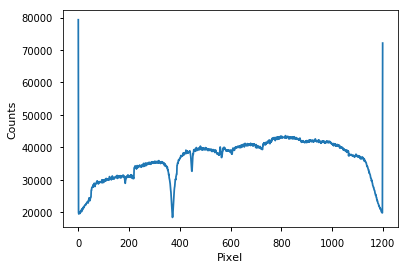

In [13]:
init = [1.0, 300.]
coeff_star10, covar_star10 = curve_fit(linear_fit, x_top_star10, y_top_star10, p0=init)
x_fit_star10 = np.linspace(0,1400,1000)
y_fit_star10 = linear_fit(x_fit_star10, *coeff_star10)
label_str_star10 = "y = %.3f*x + %.2f" % (coeff_star10[0], coeff_star10[1])

plt.scatter(x_top_star10, y_top_star10, color='c')
plt.plot(x_fit_star10, y_fit_star10, color='c', label=label_str_star10)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star10 = np.floor(linear_fit(x_pix, coeff_star10[0], coeff_star10[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star10 = y_pix_star10 - 1
target_lower_star10 = y_pix_star10 - 4
sky_upper_star10 = y_pix_star10 + 50
sky_lower_star10 = y_pix_star10 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star10 = np.asarray(
            [calibrated_science_data[0].T[i, target_lower_star10[i]:target_upper_star10[i]] 
             for i in range(1200)]
           ).T

sky_star10 = np.asarray(
         [calibrated_science_data[0].T[i, sky_lower_star10[i]:sky_upper_star10[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star10 = np.median(sky_star10, axis=0)
target_skysub_star10 = target_star10 - column_medians_star10

target_skysub_1d_star10 = np.sum(target_skysub_star10, axis=0)
target_skysub_1d_star10 = target_skysub_1d_star10[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star10)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 11

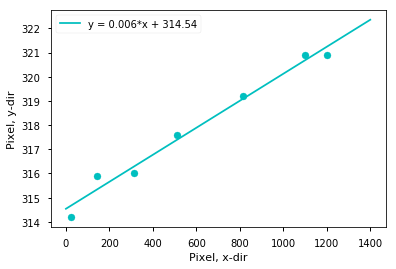

Text(0, 0.5, 'Counts')

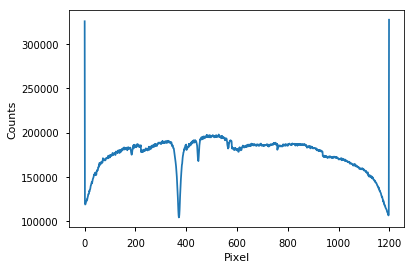

In [14]:
init = [1.0, 300.]
coeff_star11, covar_star11 = curve_fit(linear_fit, x_top_star11, y_top_star11, p0=init)
x_fit_star11 = np.linspace(0,1400,1000)
y_fit_star11 = linear_fit(x_fit_star11, *coeff_star11)
label_str_star11 = "y = %.3f*x + %.2f" % (coeff_star11[0], coeff_star11[1])

plt.scatter(x_top_star11, y_top_star11, color='c')
plt.plot(x_fit_star11, y_fit_star11, color='c', label=label_str_star11)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star11 = np.floor(linear_fit(x_pix, coeff_star11[0], coeff_star11[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star11 = y_pix_star11 - 1
target_lower_star11 = y_pix_star11 - 6
sky_upper_star11 = y_pix_star11 + 50
sky_lower_star11 = y_pix_star11 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star11 = np.asarray(
            [calibrated_science_data[1].T[i, target_lower_star11[i]:target_upper_star11[i]] 
             for i in range(1200)]
           ).T

sky_star11 = np.asarray(
         [calibrated_science_data[1].T[i, sky_lower_star11[i]:sky_upper_star11[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star11 = np.median(sky_star11, axis=0)
target_skysub_star11 = target_star11 - column_medians_star11

target_skysub_1d_star11 = np.sum(target_skysub_star11, axis=0)
target_skysub_1d_star11 = target_skysub_1d_star11[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star11)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 12

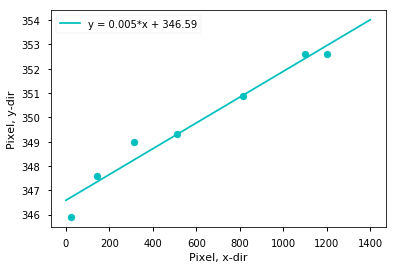

Text(0, 0.5, 'Counts')

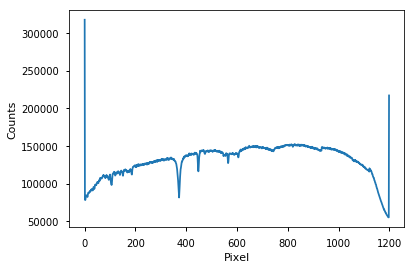

In [15]:
init = [1.0, 300.]
coeff_star12, covar_star12 = curve_fit(linear_fit, x_top_star12, y_top_star12, p0=init)
x_fit_star12 = np.linspace(0,1400,1000)
y_fit_star12 = linear_fit(x_fit_star12, *coeff_star12)
label_str_star12 = "y = %.3f*x + %.2f" % (coeff_star12[0], coeff_star12[1])

plt.scatter(x_top_star12, y_top_star12, color='c')
plt.plot(x_fit_star12, y_fit_star12, color='c', label=label_str_star12)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star12 = np.floor(linear_fit(x_pix, coeff_star12[0], coeff_star12[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star12 = y_pix_star12 - 0
target_lower_star12 = y_pix_star12 - 5
sky_upper_star12 = y_pix_star12 + 50
sky_lower_star12 = y_pix_star12 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star12 = np.asarray(
            [calibrated_science_data[2].T[i, target_lower_star12[i]:target_upper_star12[i]] 
             for i in range(1200)]
           ).T

sky_star12 = np.asarray(
         [calibrated_science_data[2].T[i, sky_lower_star12[i]:sky_upper_star12[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star12 = np.median(sky_star12, axis=0)
target_skysub_star12 = target_star12 - column_medians_star12

target_skysub_1d_star12 = np.sum(target_skysub_star12, axis=0)
target_skysub_1d_star12 = target_skysub_1d_star12[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star12)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 12 Companion

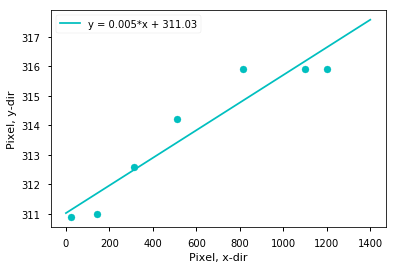

Text(0, 0.5, 'Counts')

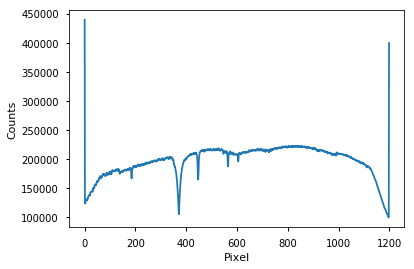

In [16]:
init = [1.0, 300.]
coeff_star12_companion, covar_star12_companion = curve_fit(linear_fit, x_top_star12_companion, y_top_star12_companion, p0=init)
x_fit_star12_companion = np.linspace(0,1400,1000)
y_fit_star12_companion = linear_fit(x_fit_star12_companion, *coeff_star12_companion)
label_str_star12_companion = "y = %.3f*x + %.2f" % (coeff_star12_companion[0], coeff_star12_companion[1])

plt.scatter(x_top_star12_companion, y_top_star12_companion, color='c')
plt.plot(x_fit_star12_companion, y_fit_star12_companion, color='c', label=label_str_star12_companion)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star12_companion = np.floor(linear_fit(x_pix, coeff_star12_companion[0], coeff_star12_companion[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star12_companion = y_pix_star12_companion - 0
target_lower_star12_companion = y_pix_star12_companion - 7
sky_upper_star12_companion = y_pix_star12_companion + 50
sky_lower_star12_companion = y_pix_star12_companion + 40

# Extract slices corresponding to the target spectrum and sky background
target_star12_companion = np.asarray(
            [calibrated_science_data[3].T[i, target_lower_star12_companion[i]:target_upper_star12_companion[i]] 
             for i in range(1200)]
           ).T

sky_star12_companion = np.asarray(
         [calibrated_science_data[3].T[i, sky_lower_star12_companion[i]:sky_upper_star12_companion[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star12_companion = np.median(sky_star12_companion, axis=0)
target_skysub_star12_companion = target_star12_companion - column_medians_star12_companion

target_skysub_1d_star12_companion = np.sum(target_skysub_star12_companion, axis=0)
target_skysub_1d_star12_companion = target_skysub_1d_star12_companion[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star12_companion)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 13

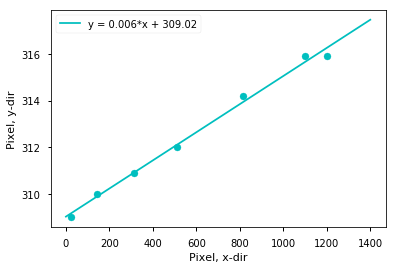

Text(0, 0.5, 'Counts')

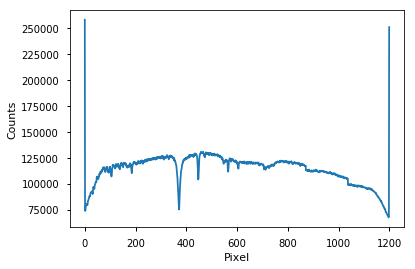

In [17]:
init = [1.0, 300.]
coeff_star13, covar_star13 = curve_fit(linear_fit, x_top_star13, y_top_star13, p0=init)
x_fit_star13 = np.linspace(0,1400,1000)
y_fit_star13 = linear_fit(x_fit_star13, *coeff_star13)
label_str_star13 = "y = %.3f*x + %.2f" % (coeff_star13[0], coeff_star13[1])

plt.scatter(x_top_star13, y_top_star13, color='c')
plt.plot(x_fit_star13, y_fit_star13, color='c', label=label_str_star13)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star13 = np.floor(linear_fit(x_pix, coeff_star13[0], coeff_star13[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star13 = y_pix_star13 - 1
target_lower_star13 = y_pix_star13 - 5
sky_upper_star13 = y_pix_star13 + 50
sky_lower_star13 = y_pix_star13 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star13 = np.asarray(
            [calibrated_science_data[4].T[i, target_lower_star13[i]:target_upper_star13[i]] 
             for i in range(1200)]
           ).T

sky_star13 = np.asarray(
         [calibrated_science_data[4].T[i, sky_lower_star13[i]:sky_upper_star13[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star13 = np.median(sky_star13, axis=0)
target_skysub_star13 = target_star13 - column_medians_star13

target_skysub_1d_star13 = np.sum(target_skysub_star13, axis=0)
target_skysub_1d_star13 = target_skysub_1d_star13[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star13)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 14

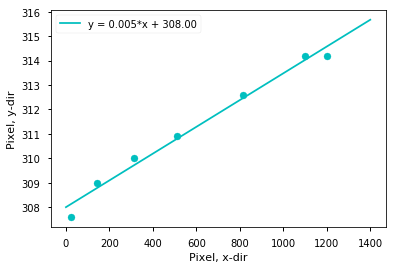

Text(0, 0.5, 'Counts')

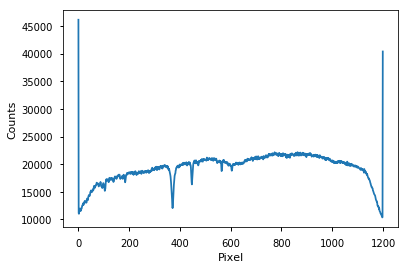

In [18]:
init = [1.0, 300.]
coeff_star14, covar_star14 = curve_fit(linear_fit, x_top_star14, y_top_star14, p0=init)
x_fit_star14 = np.linspace(0,1400,1000)
y_fit_star14 = linear_fit(x_fit_star14, *coeff_star14)
label_str_star14 = "y = %.3f*x + %.2f" % (coeff_star14[0], coeff_star14[1])

plt.scatter(x_top_star14, y_top_star14, color='c')
plt.plot(x_fit_star14, y_fit_star14, color='c', label=label_str_star14)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star14 = np.floor(linear_fit(x_pix, coeff_star14[0], coeff_star14[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star14 = y_pix_star14 - 0
target_lower_star14 = y_pix_star14 - 5
sky_upper_star14 = y_pix_star14 + 50
sky_lower_star14 = y_pix_star14 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star14 = np.asarray(
            [calibrated_science_data[5].T[i, target_lower_star14[i]:target_upper_star14[i]] 
             for i in range(1200)]
           ).T

sky_star14 = np.asarray(
         [calibrated_science_data[5].T[i, sky_lower_star14[i]:sky_upper_star14[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star14 = np.median(sky_star14, axis=0)
target_skysub_star14 = target_star14 - column_medians_star14

target_skysub_1d_star14 = np.sum(target_skysub_star14, axis=0)
target_skysub_1d_star14 = target_skysub_1d_star14[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star14)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 15

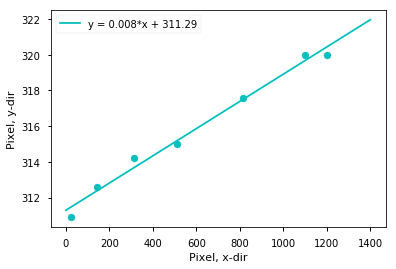

Text(0, 0.5, 'Counts')

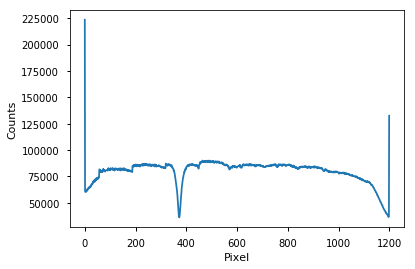

In [19]:
init = [1.0, 300.]
coeff_star15, covar_star15 = curve_fit(linear_fit, x_top_star15, y_top_star15, p0=init)
x_fit_star15 = np.linspace(0,1400,1000)
y_fit_star15 = linear_fit(x_fit_star15, *coeff_star15)
label_str_star15 = "y = %.3f*x + %.2f" % (coeff_star15[0], coeff_star15[1])

plt.scatter(x_top_star15, y_top_star15, color='c')
plt.plot(x_fit_star15, y_fit_star15, color='c', label=label_str_star15)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star15 = np.floor(linear_fit(x_pix, coeff_star15[0], coeff_star15[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star15 = y_pix_star15 - 0
target_lower_star15 = y_pix_star15 - 4
sky_upper_star15 = y_pix_star15 + 50
sky_lower_star15 = y_pix_star15 + 40

# Extract slices corresponding to the target spectrum and sky background
target_star15 = np.asarray(
            [calibrated_science_data[6].T[i, target_lower_star15[i]:target_upper_star15[i]] 
             for i in range(1200)]
           ).T

sky_star15 = np.asarray(
         [calibrated_science_data[6].T[i, sky_lower_star15[i]:sky_upper_star15[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star15 = np.median(sky_star15, axis=0)
target_skysub_star15 = target_star15 - column_medians_star15

target_skysub_1d_star15 = np.sum(target_skysub_star15, axis=0)
target_skysub_1d_star15 = target_skysub_1d_star15[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star15)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Star 15 Companion

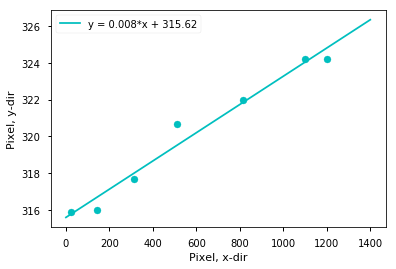

Text(0, 0.5, 'Counts')

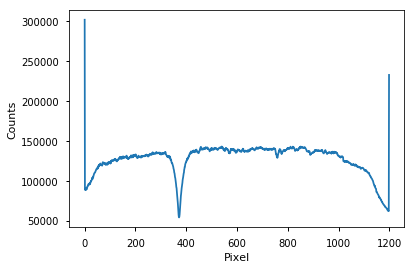

In [20]:
init = [1.0, 300.]
coeff_star15_companion, covar_star15_companion = curve_fit(linear_fit, x_top_star15_companion, y_top_star15_companion, p0=init)
x_fit_star15_companion = np.linspace(0,1400,1000)
y_fit_star15_companion = linear_fit(x_fit_star15_companion, *coeff_star15_companion)
label_str_star15_companion = "y = %.3f*x + %.2f" % (coeff_star15_companion[0], coeff_star15_companion[1])

plt.scatter(x_top_star15_companion, y_top_star15_companion, color='c')
plt.plot(x_fit_star15_companion, y_fit_star15_companion, color='c', label=label_str_star15_companion)
plt.xlabel("Pixel, x-dir")
plt.ylabel("Pixel, y-dir")
plt.legend()
plt.show()

x_pix = np.asarray([i for i in range(1200)]) 
y_pix_star15_companion = np.floor(linear_fit(x_pix, coeff_star15_companion[0], coeff_star15_companion[1])).astype(int)  # to ensure our pixel number is an int

# Arrays of length len(x_pix)
target_upper_star15_companion = y_pix_star15_companion - 0
target_lower_star15_companion = y_pix_star15_companion - 5
sky_upper_star15_companion = y_pix_star15_companion + 50
sky_lower_star15_companion = y_pix_star15_companion + 40

# Extract slices corresponding to the target spectrum and sky background
target_star15_companion = np.asarray(
            [calibrated_science_data[7].T[i, target_lower_star15_companion[i]:target_upper_star15_companion[i]] 
             for i in range(1200)]
           ).T

sky_star15_companion = np.asarray(
         [calibrated_science_data[7].T[i, sky_lower_star15_companion[i]:sky_upper_star15_companion[i]] 
          for i in range(1200)]
        ).T

# Subtract sky background from target
column_medians_star15_companion = np.median(sky_star15_companion, axis=0)
target_skysub_star15_companion = target_star15_companion - column_medians_star15_companion

target_skysub_1d_star15_companion = np.sum(target_skysub_star15_companion, axis=0)
target_skysub_1d_star15_companion = target_skysub_1d_star15_companion[::-1]  # plot the spectrum correctly, i.e. blue to the left
plt.plot(x_pix, target_skysub_1d_star15_companion)
plt.xlabel("Pixel")
plt.ylabel("Counts")

## Converting from Pixel to Wavelength

[   0   50   59   67  102  145  367  617 1030 1083 1128 1162]


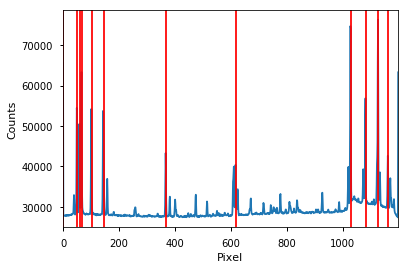

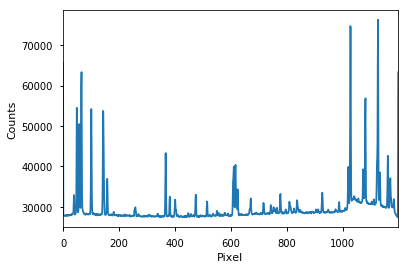

In [21]:
# Get a section of the arc image
# Don't need to use whole thing!
# Choose a region that seems relatively clean
arc_slice = arc[150:300, :1200]
arc_slice_1d = np.sum(arc_slice, axis=0)
arc_slice_1d = arc_slice_1d[::-1]  # again, put bluer wavelengths toward the left

# Find the peaks by setting a threshold
peaks = np.where(arc_slice_1d > 40000)[0]

# Some peaks also have pixels to either side that exceed the threshold
# We will take just the rightmost pixel for now
# Not 100% accurate, but okay for now
unique_peaks = peaks[np.where((peaks[1:] - peaks[:-1]) > 1)]

print(unique_peaks)
plt.plot(x_pix, arc_slice_1d)
for j in unique_peaks:
    plt.axvline(j, color='r')
plt.xlabel("Pixel")
plt.ylabel("Counts")
plt.xlim(0,1198)
plt.show()

plt.plot(x_pix, arc_slice_1d)
plt.xlabel("Pixel")
plt.ylabel("Counts")
plt.xlim(0,1198)
plt.show()

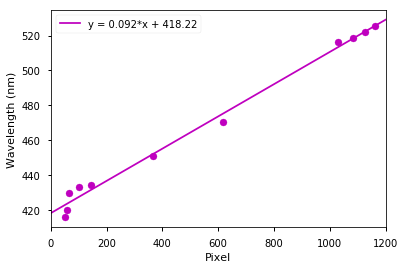

In [22]:
arc_pixels = [50, 59, 67, 102, 145, 367, 617, 1030, 1083, 1128, 1162]
arc_wavelengths = [415.8, 420, 430, 433.3, 434.5, 451, 470.2, 516.2, 518.7, 522.1, 525.2]

# Fit a linear line to create a mapping between pixels and wavelengths
arc_init = [3, 500.0]
arc_coeff, arc_covar = curve_fit(linear_fit, arc_pixels, arc_wavelengths, p0=arc_init)
pix_fit = np.linspace(0,1200,1000)
wavelength_fit = linear_fit(pix_fit, *arc_coeff)
label_str = "y = %.3f*x + %.2f" % (arc_coeff[0], arc_coeff[1])

plt.scatter(arc_pixels, arc_wavelengths, color='m')
plt.plot(pix_fit, wavelength_fit, color='m', label=label_str)
plt.xlim(0,1200)
plt.xlabel("Pixel")
plt.ylabel("Wavelength (nm)")
plt.legend(loc=2)

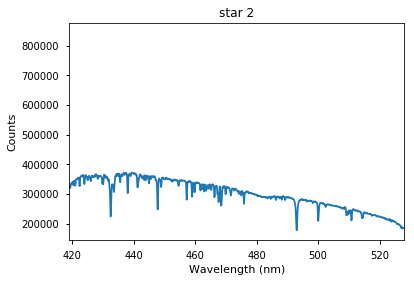

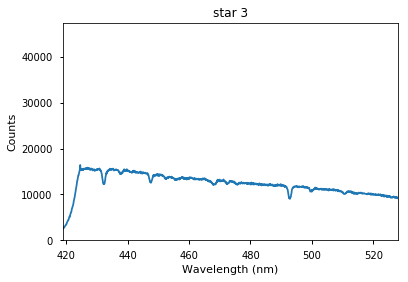

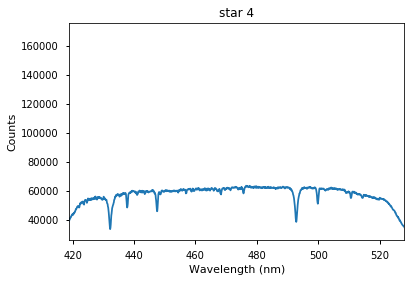

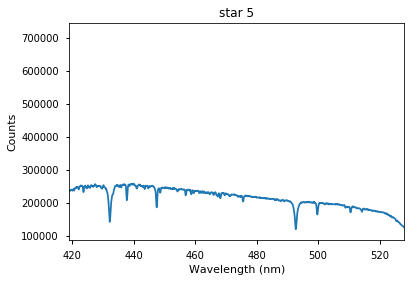

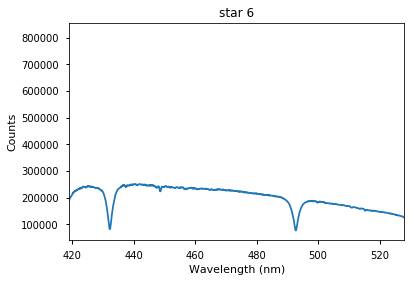

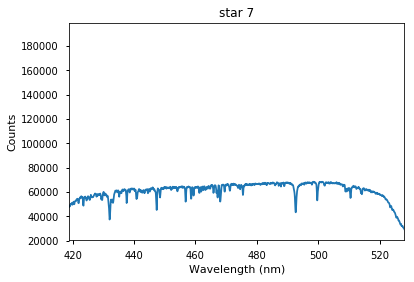

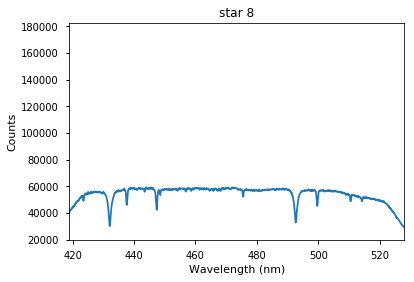

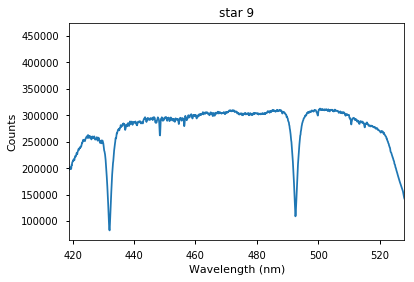

In [23]:
x_wavelengths = linear_fit(x_pix, *arc_coeff)

plt.plot(x_wavelengths, target_skysub_1d_star2)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 2')
plt.xlim(419,528)
plt.show()

plt.plot(x_wavelengths, target_skysub_1d_star3)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 3')
plt.xlim(419,528)
plt.show()

plt.plot(x_wavelengths, target_skysub_1d_star4)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 4')
plt.xlim(419,528)
plt.show()

plt.plot(x_wavelengths, target_skysub_1d_star5)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 5')
plt.xlim(419,528)
plt.show()

plt.plot(x_wavelengths, target_skysub_1d_star6)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 6')
plt.xlim(419,528)
plt.show()

plt.plot(x_wavelengths, target_skysub_1d_star7)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 7')
plt.xlim(419,528)
plt.show()

plt.plot(x_wavelengths, target_skysub_1d_star8)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 8')
plt.xlim(419,528)
plt.show()

plt.plot(x_wavelengths, target_skysub_1d_star9)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 9')
plt.xlim(419,528)
plt.show()



[   0   37  171  748  780 1164]


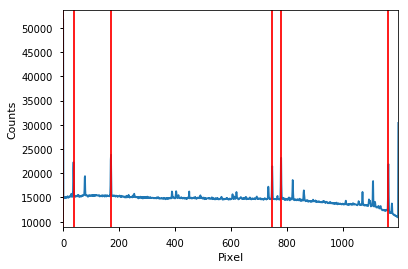

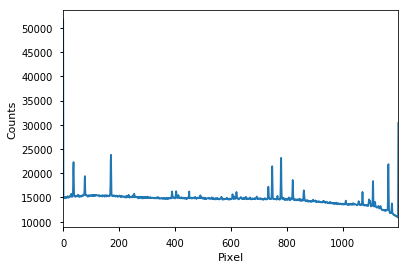

In [24]:
# Get a section of the arc image
# Don't need to use whole thing!
# Choose a region that seems relatively clean
arc_slice2 = arc2[300:350, :1200]
arc_slice_1d2 = np.sum(arc_slice2, axis=0)
arc_slice_1d2 = arc_slice_1d2[::-1]  # again, put bluer wavelengths toward the left

# Find the peaks by setting a threshold
peaks2 = np.where(arc_slice_1d2 > 21000)[0]

# Some peaks also have pixels to either side that exceed the threshold
# We will take just the rightmost pixel for now
# Not 100% accurate, but okay for now
unique_peaks2 = peaks2[np.where((peaks2[1:] - peaks2[:-1]) > 1)]

print(unique_peaks2)
plt.plot(x_pix, arc_slice_1d2)
for j in unique_peaks2:
    plt.axvline(j, color='r')
plt.xlabel("Pixel")
plt.ylabel("Counts")
plt.xlim(0,1198)
plt.show()

plt.plot(x_pix, arc_slice_1d2)
plt.xlabel("Pixel")
plt.ylabel("Counts")
plt.xlim(0,1198)
plt.show()

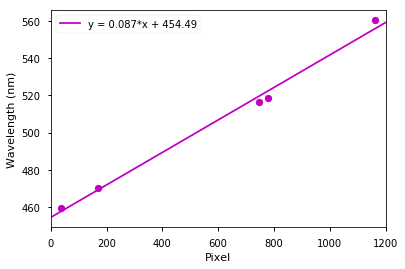

In [25]:
arc_pixels2 = [37, 171, 748, 780, 1164]
arc_wavelengths2 = [459.6, 470.2, 516.2, 518.7, 560.6]

# Fit a linear line to create a mapping between pixels and wavelengths
arc_init = [3, 500.0]
arc_coeff2, arc_covar2 = curve_fit(linear_fit, arc_pixels2, arc_wavelengths2, p0=arc_init)
pix_fit = np.linspace(0,1200,1000)
wavelength_fit2 = linear_fit(pix_fit, *arc_coeff2)
label_str2 = "y = %.3f*x + %.2f" % (arc_coeff2[0], arc_coeff2[1])

plt.scatter(arc_pixels2, arc_wavelengths2, color='m')
plt.plot(pix_fit, wavelength_fit2, color='m', label=label_str2)
plt.xlim(0,1200)
plt.xlabel("Pixel")
plt.ylabel("Wavelength (nm)")
plt.legend(loc=2)

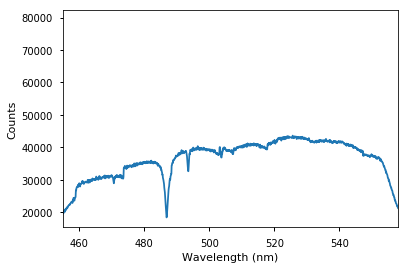

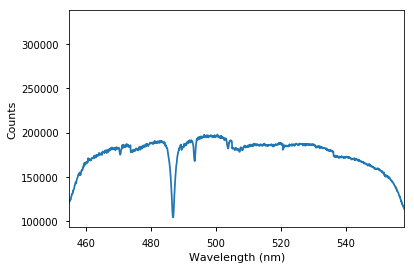

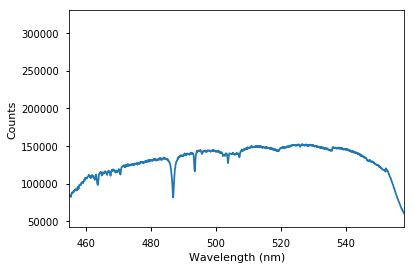

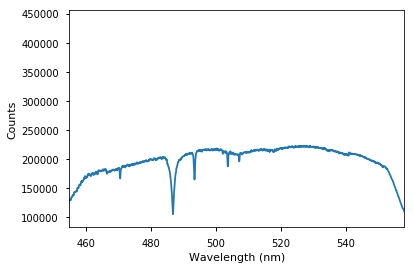

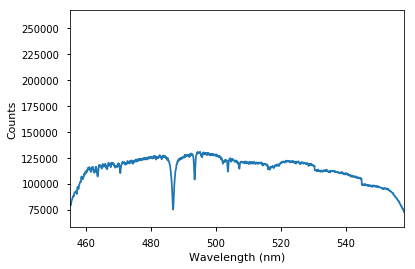

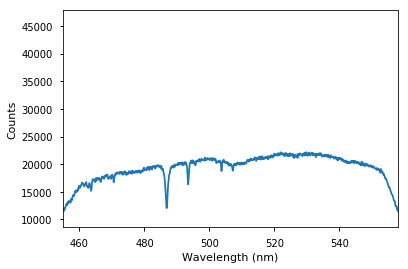

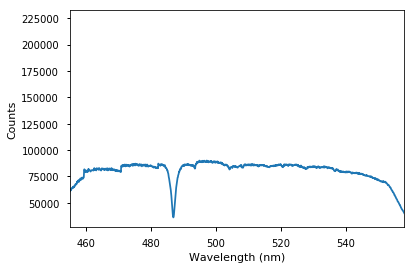

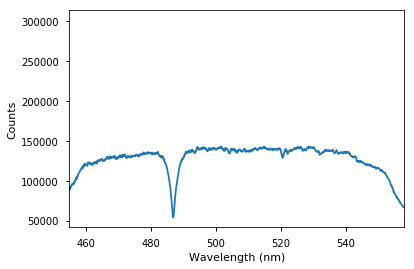

In [26]:
x_wavelengths2 = linear_fit(x_pix, *arc_coeff2)

plt.plot(x_wavelengths2, target_skysub_1d_star10)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.xlim(455,558)
plt.show()

plt.plot(x_wavelengths2, target_skysub_1d_star11)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.xlim(455,558)
plt.show()

plt.plot(x_wavelengths2, target_skysub_1d_star12)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.xlim(455,558)
plt.show()

plt.plot(x_wavelengths2, target_skysub_1d_star12_companion)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.xlim(455,558)
plt.show()

plt.plot(x_wavelengths2, target_skysub_1d_star13)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.xlim(455,558)
plt.show()

plt.plot(x_wavelengths2, target_skysub_1d_star14)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.xlim(455,558)
plt.show()

plt.plot(x_wavelengths2, target_skysub_1d_star15)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.xlim(455,558)
plt.show()

plt.plot(x_wavelengths2, target_skysub_1d_star15_companion)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.xlim(455,558)
plt.show()

# Using `specutils` to analyze the spectrum

## The `Spectrum1D` object and continuum fitting

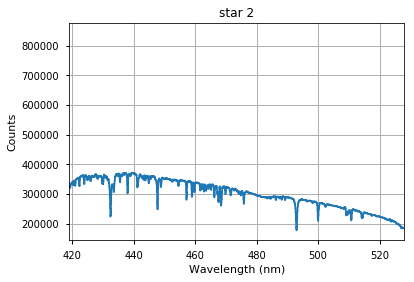

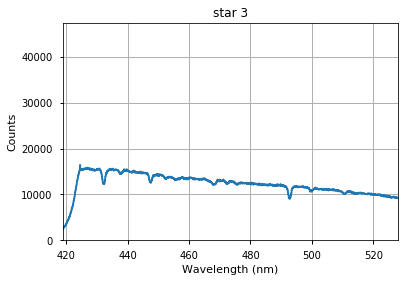

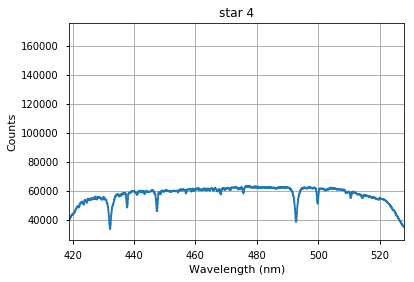

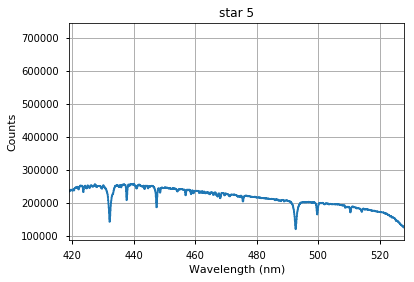

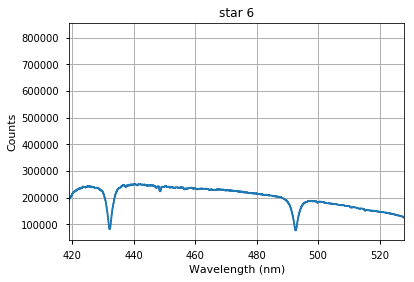

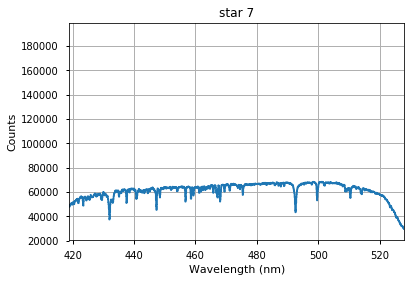

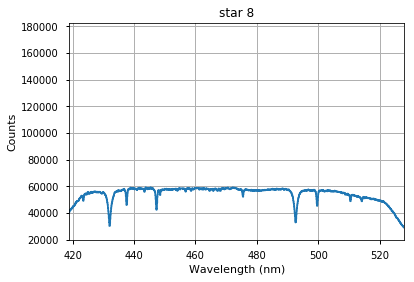

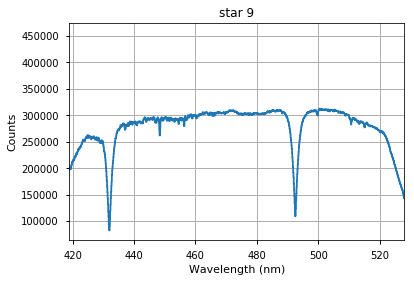

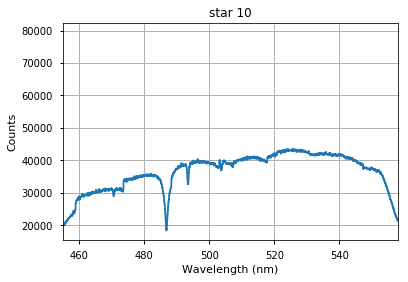

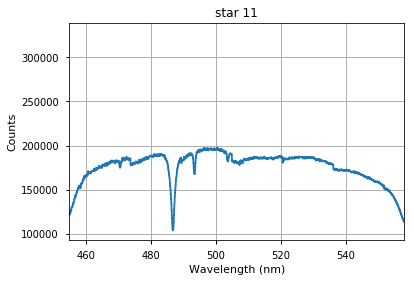

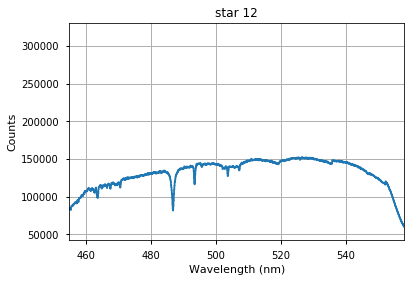

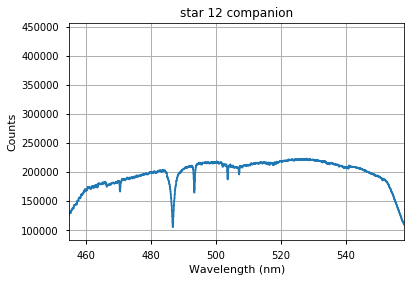

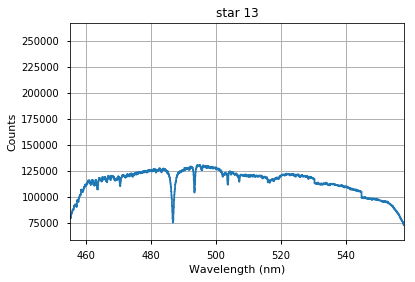

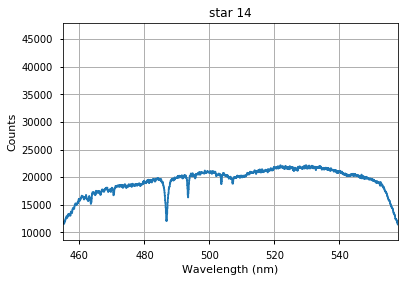

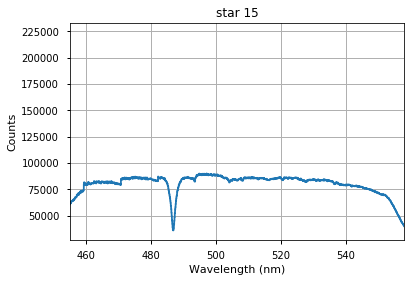

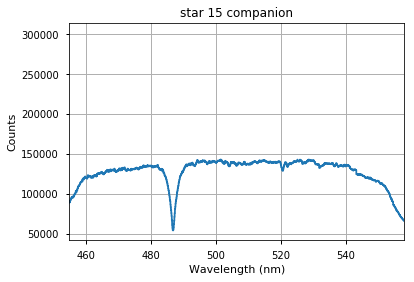

In [27]:
import specutils
import astropy.units as u

spec_star2 = specutils.Spectrum1D(spectral_axis=x_wavelengths*u.nm, flux=target_skysub_1d_star2*u.count)
plt.step(spec_star2.spectral_axis, spec_star2.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 2')
plt.xlim(419,528)
plt.show()

spec_star3 = specutils.Spectrum1D(spectral_axis=x_wavelengths*u.nm, flux=target_skysub_1d_star3*u.count)
plt.step(spec_star3.spectral_axis, spec_star3.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 3')
plt.xlim(419,528)
plt.show()

spec_star4 = specutils.Spectrum1D(spectral_axis=x_wavelengths*u.nm, flux=target_skysub_1d_star4*u.count)
plt.step(spec_star4.spectral_axis, spec_star4.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 4')
plt.xlim(419,528)
plt.show()

spec_star5 = specutils.Spectrum1D(spectral_axis=x_wavelengths*u.nm, flux=target_skysub_1d_star5*u.count)
plt.step(spec_star5.spectral_axis, spec_star5.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 5')
plt.xlim(419,528)
plt.show()

spec_star6 = specutils.Spectrum1D(spectral_axis=x_wavelengths*u.nm, flux=target_skysub_1d_star6*u.count)
plt.step(spec_star6.spectral_axis, spec_star6.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 6')
plt.xlim(419,528)
plt.show()

spec_star7 = specutils.Spectrum1D(spectral_axis=x_wavelengths*u.nm, flux=target_skysub_1d_star7*u.count)
plt.step(spec_star7.spectral_axis, spec_star7.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 7')
plt.xlim(419,528)
plt.show()

spec_star8 = specutils.Spectrum1D(spectral_axis=x_wavelengths*u.nm, flux=target_skysub_1d_star8*u.count)
plt.step(spec_star8.spectral_axis, spec_star8.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 8')
plt.xlim(419,528)
plt.show()

spec_star9 = specutils.Spectrum1D(spectral_axis=x_wavelengths*u.nm, flux=target_skysub_1d_star9*u.count)
plt.step(spec_star9.spectral_axis, spec_star9.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 9')
plt.xlim(419,528)
plt.show()

spec_star10 = specutils.Spectrum1D(spectral_axis=x_wavelengths2*u.nm, flux=target_skysub_1d_star10*u.count)
plt.step(spec_star10.spectral_axis, spec_star10.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 10')
plt.xlim(455,558)
plt.show()

spec_star11 = specutils.Spectrum1D(spectral_axis=x_wavelengths2*u.nm, flux=target_skysub_1d_star11*u.count)
plt.step(spec_star11.spectral_axis, spec_star11.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 11')
plt.xlim(455,558)
plt.show()

spec_star12 = specutils.Spectrum1D(spectral_axis=x_wavelengths2*u.nm, flux=target_skysub_1d_star12*u.count)
plt.step(spec_star12.spectral_axis, spec_star12.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 12')
plt.xlim(455,558)
plt.show()

spec_star12_companion = specutils.Spectrum1D(spectral_axis=x_wavelengths2*u.nm, flux=target_skysub_1d_star12_companion*u.count)
plt.step(spec_star12_companion.spectral_axis, spec_star12_companion.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 12 companion')
plt.xlim(455,558)
plt.show()

spec_star13 = specutils.Spectrum1D(spectral_axis=x_wavelengths2*u.nm, flux=target_skysub_1d_star13*u.count)
plt.step(spec_star13.spectral_axis, spec_star13.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 13')
plt.xlim(455,558)
plt.show()

spec_star14 = specutils.Spectrum1D(spectral_axis=x_wavelengths2*u.nm, flux=target_skysub_1d_star14*u.count)
plt.step(spec_star14.spectral_axis, spec_star14.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 14')
plt.xlim(455,558)
plt.show()

spec_star15 = specutils.Spectrum1D(spectral_axis=x_wavelengths2*u.nm, flux=target_skysub_1d_star15*u.count)
plt.step(spec_star15.spectral_axis, spec_star15.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 15')
plt.xlim(455,558)
plt.show()

spec_star15_companion = specutils.Spectrum1D(spectral_axis=x_wavelengths2*u.nm, flux=target_skysub_1d_star15_companion*u.count)
plt.step(spec_star15_companion.spectral_axis, spec_star15_companion.flux)
plt.grid()
plt.xlabel("Wavelength (nm)")
plt.ylabel("Counts")
plt.title('star 15 companion')
plt.xlim(455,558)
plt.show()


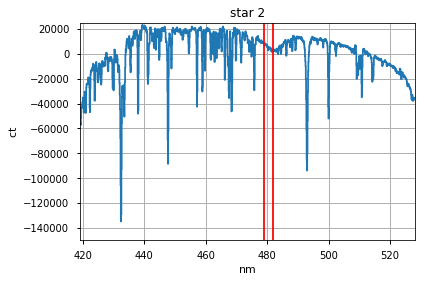

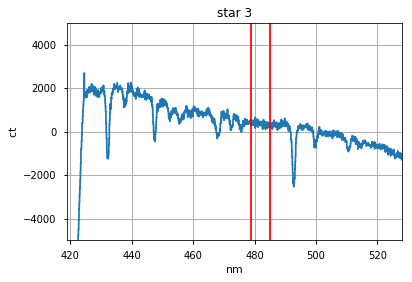

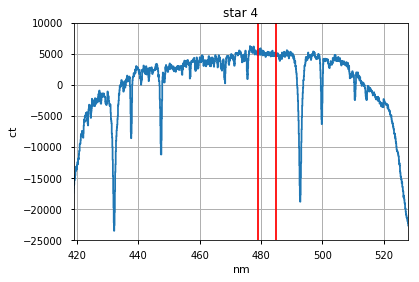

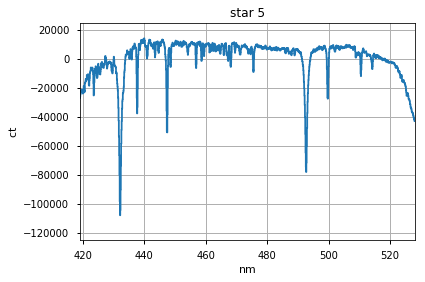

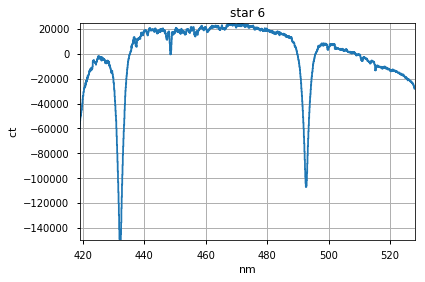

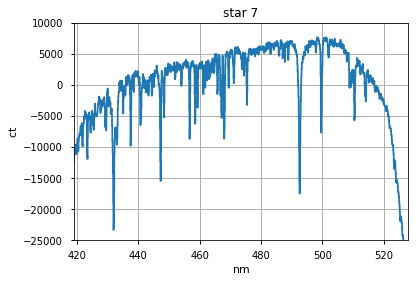

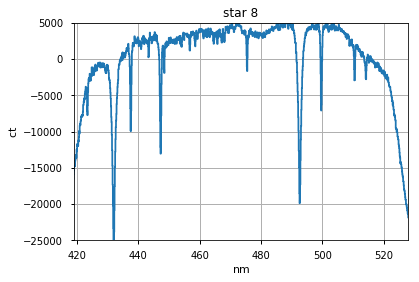

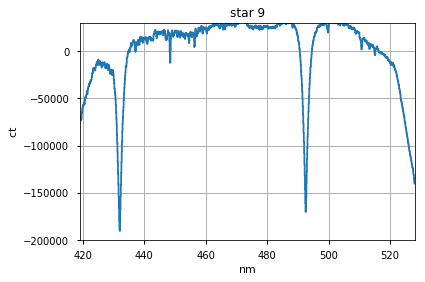

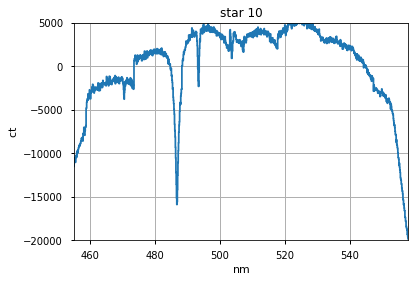

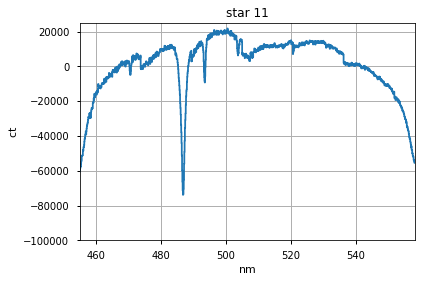

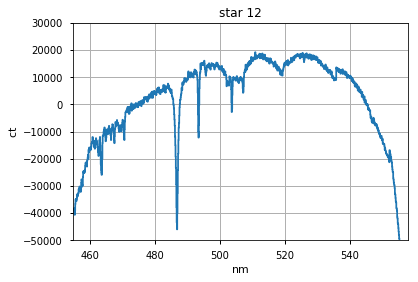

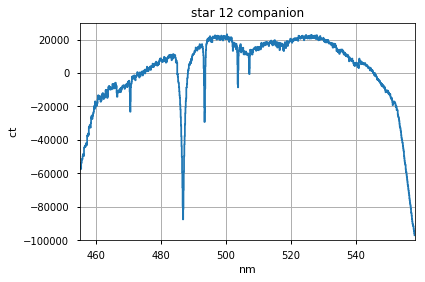

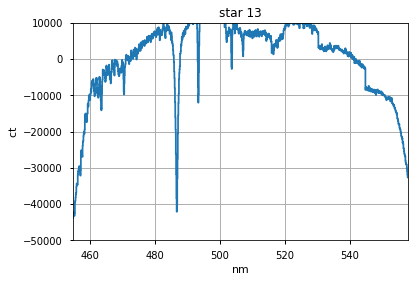

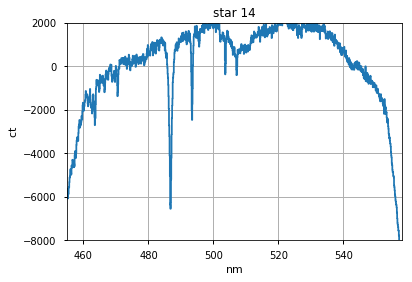

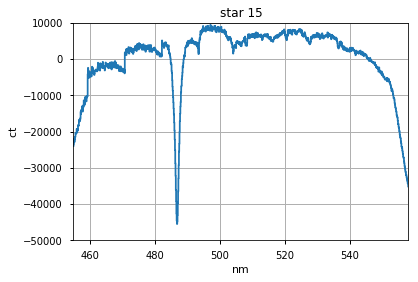

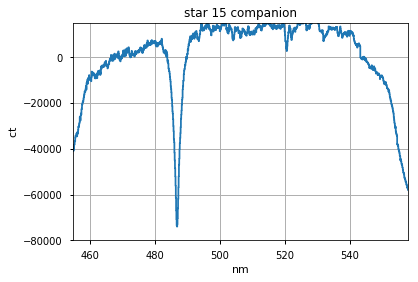

In [58]:
from specutils.fitting import fit_generic_continuum
from astropy.modeling import models
from astropy.modeling.fitting import LevMarLSQFitter

cont_star2 = fit_generic_continuum(spec_star2, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[419*u.nm, 528*u.nm]))
#cont_star2 = fit_generic_continuum(spec_star2)
spec_contsub_star2 = spec_star2 - cont_star2(spec_star2.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star2.wavelength.to(u.nm), spec_contsub_star2.flux)  
plt.ylim(-150000,25000)
plt.title('star 2')
plt.xlim(419,528)
plt.axvline(479, color = 'r')
plt.axvline(482, color = 'r')
plt.grid()
plt.show()

cont_star3 = fit_generic_continuum(spec_star3, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[419*u.nm, 528*u.nm]))
#cont_star3 = fit_generic_continuum(spec_star3)
spec_contsub_star3 = spec_star3 - cont_star3(spec_star3.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star3.wavelength.to(u.nm), spec_contsub_star3.flux) 
plt.ylim(-5000,5000)
plt.title('star 3')
plt.xlim(419,528)
plt.axvline(479, color = 'r')
plt.axvline(485, color = 'r')
plt.grid()
plt.show()

cont_star4 = fit_generic_continuum(spec_star4, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[419*u.nm, 528*u.nm]))
#cont_star4 = fit_generic_continuum(spec_star4)
spec_contsub_star4 = spec_star4 - cont_star4(spec_star4.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star4.wavelength.to(u.nm), spec_contsub_star4.flux) 
plt.ylim(-25000,10000)
plt.title('star 4')
plt.xlim(419,528)
plt.axvline(479, color = 'r')
plt.axvline(485, color = 'r')
plt.grid()
plt.show()

cont_star5 = fit_generic_continuum(spec_star5, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[419*u.nm, 528*u.nm]))
#cont_star5 = fit_generic_continuum(spec_star5)
spec_contsub_star5 = spec_star5 - cont_star5(spec_star5.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star5.wavelength.to(u.nm), spec_contsub_star5.flux)  
plt.ylim(-125000,25000)
plt.axvline(615, color = 'r')
plt.title('star 5')
plt.xlim(419,528)
plt.grid()
plt.show()

cont_star6 = fit_generic_continuum(spec_star6, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[419*u.nm, 528*u.nm]))
#cont_star6 = fit_generic_continuum(spec_star6)
spec_contsub_star6 = spec_star6 - cont_star6(spec_star6.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star6.wavelength.to(u.nm), spec_contsub_star6.flux)  
plt.title('star 6')
plt.xlim(419,528)
plt.ylim(-150000,25000)
plt.grid()
plt.show()

cont_star7 = fit_generic_continuum(spec_star7, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[419*u.nm, 528*u.nm]))
#cont_star7 = fit_generic_continuum(spec_star7)
spec_contsub_star7 = spec_star7 - cont_star7(spec_star7.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star7.wavelength.to(u.nm), spec_contsub_star7.flux)  
plt.title('star 7')
plt.xlim(419,528)
plt.ylim(-25000,10000)
plt.grid()
plt.show()

cont_star8 = fit_generic_continuum(spec_star8, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[419*u.nm, 528*u.nm]))
#cont_star8 = fit_generic_continuum(spec_star8)
spec_contsub_star8 = spec_star8 - cont_star8(spec_star8.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star8.wavelength.to(u.nm), spec_contsub_star8.flux)  
plt.title('star 8')
plt.xlim(419,528)
plt.ylim(-25000,5000)
plt.grid()
plt.show()

cont_star9 = fit_generic_continuum(spec_star9, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[419*u.nm, 528*u.nm]))
#cont_star9 = fit_generic_continuum(spec_star9)
spec_contsub_star9 = spec_star9 - cont_star9(spec_star9.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star9.wavelength.to(u.nm), spec_contsub_star9.flux)  
plt.title('star 9')
plt.xlim(419,528)
plt.ylim(-200000,30000)
plt.grid()
plt.show()

cont_star10 = fit_generic_continuum(spec_star10, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[455*u.nm, 558*u.nm]))
#cont_star10 = fit_generic_continuum(spec_star10)
spec_contsub_star10 = spec_star10 - cont_star10(spec_star10.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star10.wavelength.to(u.nm), spec_contsub_star10.flux)  
plt.title('star 10')
plt.xlim(455,558)
plt.ylim(-20000,5000)
plt.grid()
plt.show()


cont_star11 = fit_generic_continuum(spec_star11, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[455*u.nm, 558*u.nm]))
#cont_star11 = fit_generic_continuum(spec_star11)
spec_contsub_star11 = spec_star11 - cont_star11(spec_star11.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star11.wavelength.to(u.nm), spec_contsub_star11.flux)  
plt.title('star 11')
plt.xlim(455,558)
plt.ylim(-100000,25000)
plt.grid()
plt.show()

cont_star12 = fit_generic_continuum(spec_star12, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[455*u.nm, 558*u.nm]))
#cont_star12 = fit_generic_continuum(spec_star12)
spec_contsub_star12 = spec_star12 - cont_star12(spec_star12.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star12.wavelength.to(u.nm), spec_contsub_star12.flux) 
plt.title('star 12')
plt.xlim(455,558)
plt.ylim(-50000,30000)
plt.grid()
plt.show()

cont_star12_companion = fit_generic_continuum(spec_star12_companion, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[455*u.nm, 558*u.nm]))
#cont_star12_companion = fit_generic_continuum(spec_star12_companion)
spec_contsub_star12_companion = spec_star12_companion - cont_star12_companion(spec_star12_companion.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star12_companion.wavelength.to(u.nm), spec_contsub_star12_companion.flux) 
plt.title('star 12 companion')
plt.xlim(455,558)
plt.ylim(-100000,30000)
plt.grid()
plt.show()

cont_star13 = fit_generic_continuum(spec_star13, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[455*u.nm, 558*u.nm]))
#cont_star13 = fit_generic_continuum(spec_star13)
spec_contsub_star13 = spec_star13 - cont_star13(spec_star13.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star13.wavelength.to(u.nm), spec_contsub_star13.flux)  
plt.title('star 13')
plt.xlim(455,558)
plt.ylim(-50000,10000)
plt.grid()
plt.show()

cont_star14 = fit_generic_continuum(spec_star14, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[455*u.nm, 558*u.nm]))
#cont_star14 = fit_generic_continuum(spec_star14)
spec_contsub_star14 = spec_star14 - cont_star14(spec_star14.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star14.wavelength.to(u.nm), spec_contsub_star14.flux)  
plt.title('star 14')
plt.xlim(455,558)
plt.ylim(-8000,2000)
plt.grid()
plt.show()

cont_star15 = fit_generic_continuum(spec_star15, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[455*u.nm, 558*u.nm]))
#cont_star15 = fit_generic_continuum(spec_star15)
spec_contsub_star15 = spec_star15 - cont_star15(spec_star15.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star15.wavelength.to(u.nm), spec_contsub_star15.flux)  
plt.title('star 15')
plt.xlim(455,558)
plt.ylim(-50000,10000)
plt.grid()
plt.show()

cont_star15_companion = fit_generic_continuum(spec_star15_companion, fitter=LevMarLSQFitter(), model=models.Polynomial1D(1,c0=100, c1=-0.1, window=[455*u.nm, 558*u.nm]))
#cont_star15_companion = fit_generic_continuum(spec_star15_companion)
spec_contsub_star15_companion = spec_star15_companion - cont_star15_companion(spec_star15_companion.spectral_axis)#fit_generic_continuum(spec)(spec.spectral_axis) # subtract the continuum, noise will be ~0
plt.step(spec_contsub_star15_companion.wavelength.to(u.nm), spec_contsub_star15_companion.flux)  
plt.title('star 15 companion')
plt.xlim(455,558)
plt.ylim(-80000,15000)
plt.grid()
plt.show()

## Analysis of the Spectrum

   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
418.39993711827015 absorption                 2
 419.2312097901675 absorption                11
 432.4392089103148 absorption               154
447.67920789510015 absorption               319
  492.937386698402 absorption               809


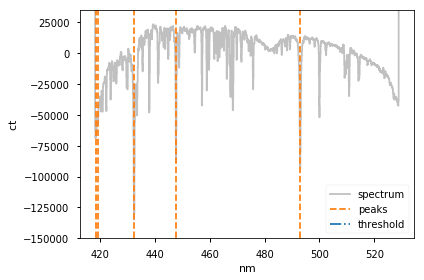

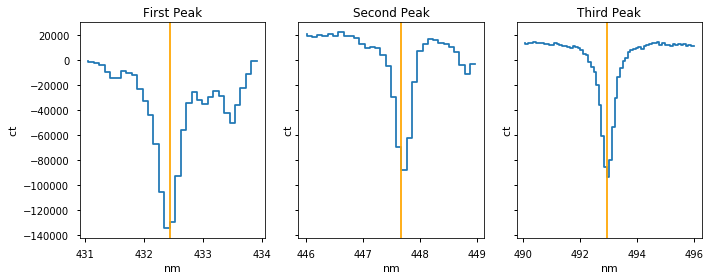

In [29]:
from specutils.manipulation import noise_region_uncertainty, extract_region
from specutils.fitting import find_lines_derivative
import specutils.analysis as an
from astropy.modeling import models
from specutils.fitting import estimate_line_parameters, fit_lines

noise_region_star2 = specutils.SpectralRegion(479*u.nm, 482*u.nm)
spec_contsub_noiseest_star2 = noise_region_uncertainty(spec_contsub_star2, noise_region_star2)

# Find lines in the spectrum using derivatives and flux value
threshold_star2 = 50000 # Choose this threshold based on your own spectrum
lines_star2 = find_lines_derivative(spec_contsub_noiseest_star2, flux_threshold=threshold_star2) 
print(lines_star2)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star2.wavelength.to(u.nm), spec_contsub_noiseest_star2.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star2['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star2, color='C0', ls='-.', label='threshold')     
plt.ylim(-150000,35000)
plt.legend()
plt.tight_layout()

fig, axes = plt.subplots(1,3, figsize=(10,4), sharey=True)  
    
# Plot the region of the first peak
peak1_star2 = specutils.SpectralRegion(431*u.nm, 434*u.nm)
peak1_spec_star2 = extract_region(spec_contsub_noiseest_star2, peak1_star2)
axes[0].step(peak1_spec_star2.wavelength.to(u.nm), peak1_spec_star2.flux)
axes[0].axvline(lines_star2['line_center'][2].value, color='orange')
axes[0].set_title('First Peak')

peak2_star2 = specutils.SpectralRegion(446*u.nm, 449*u.nm)
peak2_spec_star2 = extract_region(spec_contsub_noiseest_star2, peak2_star2)
axes[1].step(peak2_spec_star2.wavelength.to(u.nm), peak2_spec_star2.flux)
axes[1].axvline(lines_star2['line_center'][3].value, color='orange')
axes[1].set_title('Second Peak')

peak3_star2 = specutils.SpectralRegion(490*u.nm, 496*u.nm)
peak3_spec_star2 = extract_region(spec_contsub_noiseest_star2, peak3_star2)
axes[2].step(peak3_spec_star2.wavelength.to(u.nm), peak3_spec_star2.flux)
axes[2].axvline(lines_star2['line_center'][4].value, color='orange')
axes[2].set_title('Third Peak')

plt.tight_layout()

In [30]:
print('Centroid:        {0:0.03f}'.format(an.centroid(peak1_spec_star2, region=peak1_star2)))
print('FWHM:            {0:0.03f}'.format(an.fwhm(peak1_spec_star2, regions=peak1_star2)))
print('Gaussian FWHM:   {0:0.03f}'.format(an.gaussian_fwhm(peak1_spec_star2, regions=peak1_star2)))
print('Gaussian width:  {0:0.03f}'.format(an.gaussian_sigma_width(peak1_spec_star2, regions=peak1_star2)))
print('Integrated flux: {0:0.03f}'.format(an.line_flux(peak1_spec_star2, regions=peak1_star2)))
print('SNR:             {0:0.03f}'.format(an.snr(peak1_spec_star2, region=peak1_star2)))
print()
print('Centroid:        {0:0.03f}'.format(an.centroid(peak2_spec_star2, region=peak2_star2)))
print('FWHM:            {0:0.03f}'.format(an.fwhm(peak2_spec_star2, regions=peak2_star2)))
print('Gaussian FWHM:   {0:0.03f}'.format(an.gaussian_fwhm(peak2_spec_star2, regions=peak2_star2)))
print('Gaussian width:  {0:0.03f}'.format(an.gaussian_sigma_width(peak2_spec_star2, regions=peak2_star2)))
print('Integrated flux: {0:0.03f}'.format(an.line_flux(peak2_spec_star2, regions=peak2_star2)))
print('SNR:             {0:0.03f}'.format(an.snr(peak2_spec_star2, region=peak2_star2)))
print()
print('Centroid:        {0:0.03f}'.format(an.centroid(peak3_spec_star2, region=peak3_star2)))
print('FWHM:            {0:0.03f}'.format(an.fwhm(peak3_spec_star2, regions=peak3_star2)))
print('Gaussian FWHM:   {0:0.03f}'.format(an.gaussian_fwhm(peak3_spec_star2, regions=peak3_star2)))
print('Gaussian width:  {0:0.03f}'.format(an.gaussian_sigma_width(peak3_spec_star2, regions=peak3_star2)))
print('Integrated flux: {0:0.03f}'.format(an.line_flux(peak3_spec_star2, regions=peak3_star2)))
print('SNR:             {0:0.03f}'.format(an.snr(peak3_spec_star2, region=peak3_star2)))



Centroid:        432.652 nm
FWHM:            0.000 nm
Gaussian FWHM:   1.291 nm
Gaussian width:  0.548 nm
Integrated flux: -105495.118 ct nm
SNR:             -17.972

Centroid:        443.641 nm
FWHM:            1.016 nm
Gaussian FWHM:   nan nm
Gaussian width:  nan nm
Integrated flux: 3911.734 ct nm
SNR:             0.964

Centroid:        492.246 nm
FWHM:            2.032 nm
Gaussian FWHM:   15.196 nm
Gaussian width:  6.453 nm
Integrated flux: 3623.867 ct nm
SNR:             0.402


C:\Users\nsuse\AppData\Local\Continuum\anaconda3\lib\site-packages\astropy\units\quantity.py:463: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [31]:
c = 299792.458 # speed of light in km/s
v1_star2 = c*((432.652E-9-432.57525E-9)/432.57525E-9) # FeI possibly
v2_star2 = c*((443.641E-9-443.75366E-9)/443.75366E-9) # HeI possibly
v3_star2 = c*((492.246E-9-492.19612E-9)/492.19612E-9) # HeI possibly

print(v1_star2)
print(v2_star2)
print(v3_star2)

53.190909908739116
-76.1111881720007
30.381482497337835


   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
492.75265943798036 absorption               807


C:\Users\nsuse\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\nsuse\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\nsuse\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'First Peak')

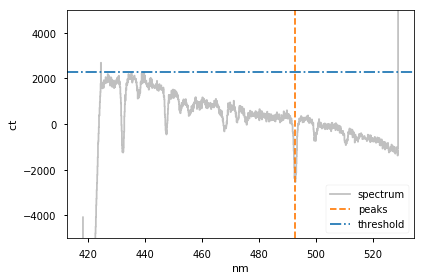

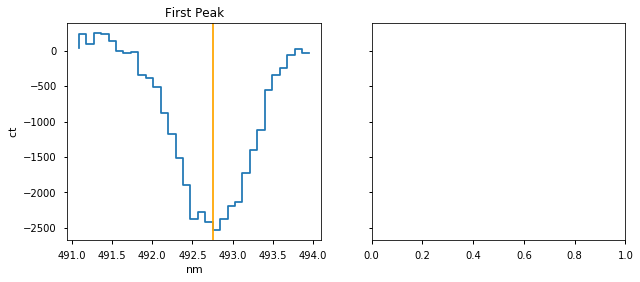

In [32]:
noise_region_star3 = specutils.SpectralRegion(600*u.nm, 620*u.nm)
spec_contsub_noiseest_star3 = noise_region_uncertainty(spec_contsub_star3, noise_region_star3)

# Find lines in the spectrum using derivatives and flux value
threshold_star3 = 2300 # Choose this threshold based on your own spectrum
lines_star3 = find_lines_derivative(spec_contsub_noiseest_star3, flux_threshold=threshold_star3) 
print(lines_star3)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star3.wavelength.to(u.nm), spec_contsub_noiseest_star3.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star3['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star3, color='C0', ls='-.', label='threshold')     
plt.ylim(-5000,5000)
plt.legend()
plt.tight_layout()

fig, axes = plt.subplots(1,2, figsize=(10,4), sharey=True)  
    
# Plot the region of the first peak
peak1_star3 = specutils.SpectralRegion(491*u.nm, 494*u.nm)
peak1_spec_star3 = extract_region(spec_contsub_noiseest_star3, peak1_star3)
axes[0].step(peak1_spec_star3.wavelength.to(u.nm), peak1_spec_star3.flux)
axes[0].axvline(lines_star3['line_center'][0].value, color='orange')
axes[0].set_title('First Peak')

In [33]:
print('Centroid:        {0:0.03f}'.format(an.centroid(peak1_spec_star3, region=peak1_star3)))
print('FWHM:            {0:0.03f}'.format(an.fwhm(peak1_spec_star3, regions=peak1_star3)))
print('Gaussian FWHM:   {0:0.03f}'.format(an.gaussian_fwhm(peak1_spec_star3, regions=peak1_star3)))
print('Gaussian width:  {0:0.03f}'.format(an.gaussian_sigma_width(peak1_spec_star3, regions=peak1_star3)))
print('Integrated flux: {0:0.03f}'.format(an.line_flux(peak1_spec_star3, regions=peak1_star3)))
print('SNR:             {0:0.03f}'.format(an.snr(peak1_spec_star3, region=peak1_star3)))

Centroid:        492.861 nm
FWHM:            0.277 nm
Gaussian FWHM:   0.637 nm
Gaussian width:  0.270 nm
Integrated flux: -2542.663 ct nm
SNR:             nan


In [34]:
v1_star3 = c*((492.861E-9-492.19612E-9)/492.19612E-9)

print(v1_star3)

404.97273622355357


   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
418.39993711827015 absorption                 2
 420.0624824620649 absorption                20
432.25448164989314 absorption               152
 447.4944806346785 absorption               317
492.75265943798036 absorption               807
 528.6821115899894 absorption              1196


Text(0.5, 1.0, 'Third Peak')

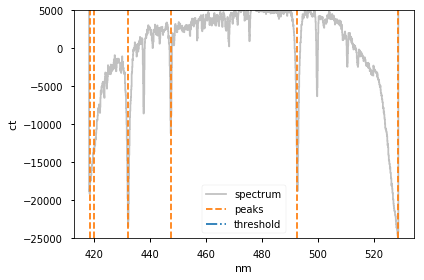

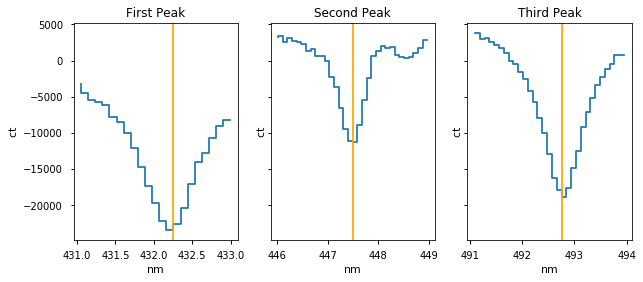

In [35]:
noise_region_star4 = specutils.SpectralRegion(479*u.nm, 485*u.nm)
spec_contsub_noiseest_star4 = noise_region_uncertainty(spec_contsub_star4, noise_region_star4)

# Find lines in the spectrum using derivatives and flux value
threshold_star4 = 10000 # Choose this threshold based on your own spectrum
lines_star4 = find_lines_derivative(spec_contsub_noiseest_star4, flux_threshold=threshold_star4) 
print(lines_star4)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star4.wavelength.to(u.nm), spec_contsub_noiseest_star4.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star4['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star4, color='C0', ls='-.', label='threshold')     
plt.ylim(-25000,5000)
plt.legend()
plt.tight_layout()

fig, axes = plt.subplots(1,3, figsize=(10,4), sharey=True)  
    
# Plot the region of the first peak
peak1_star4 = specutils.SpectralRegion(431*u.nm, 433*u.nm)
peak1_spec_star4 = extract_region(spec_contsub_noiseest_star4, peak1_star4)
axes[0].step(peak1_spec_star4.wavelength.to(u.nm), peak1_spec_star4.flux)
axes[0].axvline(lines_star4['line_center'][2].value, color='orange')
axes[0].set_title('First Peak')

peak2_star4 = specutils.SpectralRegion(446*u.nm, 449*u.nm)
peak2_spec_star4 = extract_region(spec_contsub_noiseest_star4, peak2_star4)
axes[1].step(peak2_spec_star4.wavelength.to(u.nm), peak2_spec_star4.flux)
axes[1].axvline(lines_star4['line_center'][3].value, color='orange')
axes[1].set_title('Second Peak')

peak3_star4 = specutils.SpectralRegion(491*u.nm, 494*u.nm)
peak3_spec_star4 = extract_region(spec_contsub_noiseest_star4, peak3_star4)
axes[2].step(peak3_spec_star4.wavelength.to(u.nm), peak3_spec_star4.flux)
axes[2].axvline(lines_star4['line_center'][4].value, color='orange')
axes[2].set_title('Third Peak')

In [36]:
print('Centroid:        {0:0.03f}'.format(an.centroid(peak1_spec_star4, region=peak1_star4)))
print('FWHM:            {0:0.03f}'.format(an.fwhm(peak1_spec_star4, regions=peak1_star4)))
print('Gaussian FWHM:   {0:0.03f}'.format(an.gaussian_fwhm(peak1_spec_star4, regions=peak1_star4)))
print('Gaussian width:  {0:0.03f}'.format(an.gaussian_sigma_width(peak1_spec_star4, regions=peak1_star4)))
print('Integrated flux: {0:0.03f}'.format(an.line_flux(peak1_spec_star4, regions=peak1_star4)))
print('SNR:             {0:0.03f}'.format(an.snr(peak1_spec_star4, region=peak1_star4)))
print()
print('Centroid:        {0:0.03f}'.format(an.centroid(peak2_spec_star4, region=peak2_star4)))
print('FWHM:            {0:0.03f}'.format(an.fwhm(peak2_spec_star4, regions=peak2_star4)))
print('Gaussian FWHM:   {0:0.03f}'.format(an.gaussian_fwhm(peak2_spec_star4, regions=peak2_star4)))
print('Gaussian width:  {0:0.03f}'.format(an.gaussian_sigma_width(peak2_spec_star4, regions=peak2_star4)))
print('Integrated flux: {0:0.03f}'.format(an.line_flux(peak2_spec_star4, regions=peak2_star4)))
print('SNR:             {0:0.03f}'.format(an.snr(peak2_spec_star4, region=peak2_star4)))
print()
print('Centroid:        {0:0.03f}'.format(an.centroid(peak3_spec_star4, region=peak3_star4)))
print('FWHM:            {0:0.03f}'.format(an.fwhm(peak3_spec_star4, regions=peak3_star4)))
print('Gaussian FWHM:   {0:0.03f}'.format(an.gaussian_fwhm(peak3_spec_star4, regions=peak3_star4)))
print('Gaussian width:  {0:0.03f}'.format(an.gaussian_sigma_width(peak3_spec_star4, regions=peak3_star4)))
print('Integrated flux: {0:0.03f}'.format(an.line_flux(peak3_spec_star4, regions=peak3_star4)))
print('SNR:             {0:0.03f}'.format(an.snr(peak3_spec_star4, region=peak3_star4)))

Centroid:        432.143 nm
FWHM:            0.000 nm
Gaussian FWHM:   1.051 nm
Gaussian width:  0.446 nm
Integrated flux: -24395.821 ct nm
SNR:             -42.748

Centroid:        448.225 nm
FWHM:            0.554 nm
Gaussian FWHM:   nan nm
Gaussian width:  nan nm
Integrated flux: -2521.440 ct nm
SNR:             -2.516

Centroid:        493.036 nm
FWHM:            0.462 nm
Gaussian FWHM:   nan nm
Gaussian width:  nan nm
Integrated flux: -14166.550 ct nm
SNR:             -16.203


In [37]:
v1_star2 = c*((432.143E-9-432.57525E-9)/432.57525E-9)
v2_star2 = c*((448.225E-9-443.75366E-9)/443.75366E-9)
v3_star2 = c*((493.036E-9-492.19612E-9)/492.19612E-9)

print(v1_star2)
print(v2_star2)
print(v3_star2)

-299.5670463590002
3020.761584600179
511.56374338147225


   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
418.39993711827015 absorption                 2
419.87775520164325 absorption                18
  420.524300613119 absorption                25
 423.5723004100761 absorption                58
432.16211801968234 absorption               151
 437.7039358323315 absorption               211
447.40211700446764 absorption               316
492.66029580776956 absorption               806
 499.6799317037919 absorption               882
 525.4493845326107 absorption              1161
 528.6821115899894 absorption              1196


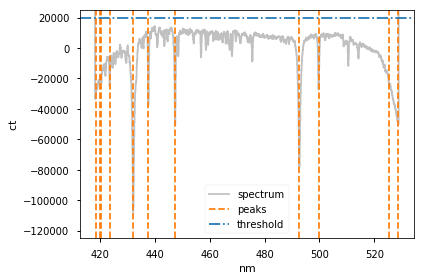

In [38]:
noise_region_star5 = specutils.SpectralRegion(600*u.nm, 615*u.nm)
spec_contsub_noiseest_star5 = noise_region_uncertainty(spec_contsub_star5, noise_region_star5)

# Find lines in the spectrum using derivatives and flux value
threshold_star5 = 20000 # Choose this threshold based on your own spectrum
lines_star5 = find_lines_derivative(spec_contsub_noiseest_star5, flux_threshold=threshold_star5) 
print(lines_star5)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star5.wavelength.to(u.nm), spec_contsub_noiseest_star5.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star5['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star5, color='C0', ls='-.', label='threshold')     
plt.ylim(-125000,25000)
plt.legend()
plt.tight_layout()

   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
432.16211801968234 absorption               151
492.66029580776956 absorption               806
 528.3126570691461 absorption              1192


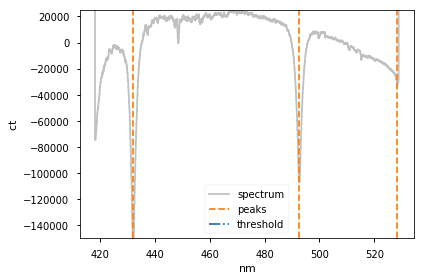

In [39]:
noise_region_star6 = specutils.SpectralRegion(580*u.nm, 610*u.nm)
spec_contsub_noiseest_star6 = noise_region_uncertainty(spec_contsub_star6, noise_region_star6)

# Find lines in the spectrum using derivatives and flux value
threshold_star6 = 30000 # Choose this threshold based on your own spectrum
lines_star6 = find_lines_derivative(spec_contsub_noiseest_star6, flux_threshold=threshold_star6) 
print(lines_star6)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star6.wavelength.to(u.nm), spec_contsub_noiseest_star6.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star6['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star6, color='C0', ls='-.', label='threshold')     
plt.ylim(-150000,25000)
plt.legend()
plt.tight_layout()

   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
419.97011883185405 absorption                19
  420.524300613119 absorption                25
 423.4799367798652 absorption                57
432.06975438947154 absorption               150
447.30975337425684 absorption               315
492.66029580776956 absorption               806
 523.4173846679727 absorption              1139
 524.0639300794484 absorption              1146
 525.3570209023999 absorption              1160
 526.6501117253514 absorption              1174
 527.1119298764055 absorption              1179
 528.2202934389353 absorption              1191
 528.6821115899894 absorption              1196


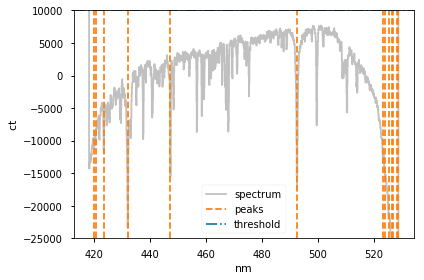

In [40]:
noise_region_star7 = specutils.SpectralRegion(600*u.nm, 610*u.nm)
spec_contsub_noiseest_star7 = noise_region_uncertainty(spec_contsub_star7, noise_region_star7)

# Find lines in the spectrum using derivatives and flux value
threshold_star7 = 10000 # Choose this threshold based on your own spectrum
lines_star7 = find_lines_derivative(spec_contsub_noiseest_star7, flux_threshold=threshold_star7) 
print(lines_star7)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star7.wavelength.to(u.nm), spec_contsub_noiseest_star7.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star7['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star7, color='C0', ls='-.', label='threshold')     
plt.ylim(-25000,10000)
plt.legend()
plt.tight_layout()

   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
 470.5853881873835   emission               567
 487.0261143649095   emission               745
 488.4115688180718   emission               760
489.24284148996924   emission               769
 489.6122960108125   emission               773
498.66393177147285   emission               871
 423.4799367798652 absorption                57
432.06975438947154 absorption               150
 437.6115722021207 absorption               210
447.30975337425684 absorption               315
492.66029580776956 absorption               806
 499.6799317037919 absorption               882
 528.6821115899894 absorption              1196


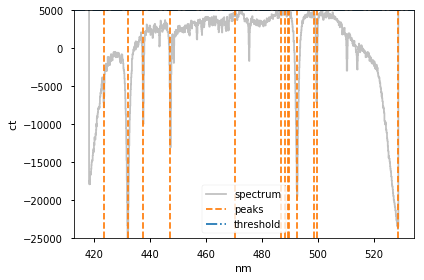

In [41]:
noise_region_star8 = specutils.SpectralRegion(595*u.nm, 610*u.nm)
spec_contsub_noiseest_star8 = noise_region_uncertainty(spec_contsub_star8, noise_region_star8)

# Find lines in the spectrum using derivatives and flux value
threshold_star8 = 5000 # Choose this threshold based on your own spectrum
lines_star8 = find_lines_derivative(spec_contsub_noiseest_star8, flux_threshold=threshold_star8) 
print(lines_star8)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star8.wavelength.to(u.nm), spec_contsub_noiseest_star8.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star8['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star8, color='C0', ls='-.', label='threshold')     
plt.ylim(-25000,5000)
plt.legend()
plt.tight_layout()

   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
418.39993711827015 absorption                 2
 431.9773907592607 absorption               149
492.56793217755876 absorption               805
 528.5897479597786 absorption              1195


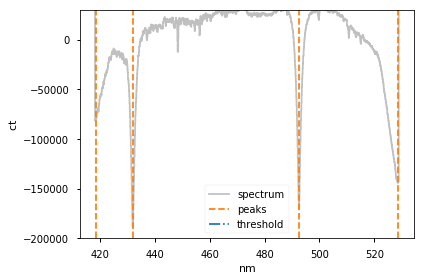

In [42]:
noise_region_star9 = specutils.SpectralRegion(590*u.nm, 610*u.nm)
spec_contsub_noiseest_star9 = noise_region_uncertainty(spec_contsub_star9, noise_region_star9)

# Find lines in the spectrum using derivatives and flux value
threshold_star9 = 75000 # Choose this threshold based on your own spectrum
lines_star9 = find_lines_derivative(spec_contsub_noiseest_star9, flux_threshold=threshold_star9) 
print(lines_star9)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star9.wavelength.to(u.nm), spec_contsub_noiseest_star9.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star9['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star9, color='C0', ls='-.', label='threshold')     
plt.ylim(-200000,30000)
plt.legend()
plt.tight_layout()

   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
 492.6791565365194   emission               438
494.16137019014496   emission               455
494.51012634393925   emission               459
494.94607153618205   emission               464
 495.4692057668735   emission               470
 495.8179619206677   emission               474
496.68985230515335   emission               484
 497.2129865358447   emission               490
  497.561742689639   emission               494
499.21833442016174   emission               513
               ...        ...               ...
  526.595692493011   emission               827
 528.0779061466367   emission               844
  528.601040377328   emission               850
 529.7344978771594   emission               863
454.66473577294516 absorption                 2
458.41386442623343 absorption                45
 486.8374909604655 absorption           

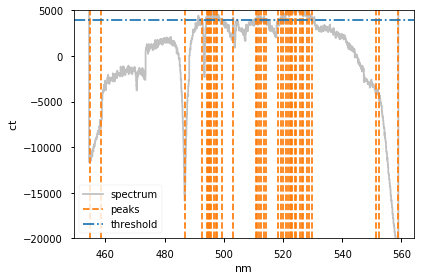

In [43]:
noise_region_star10 = specutils.SpectralRegion(620*u.nm, 635*u.nm)
spec_contsub_noiseest_star10 = noise_region_uncertainty(spec_contsub_star10, noise_region_star10)

# Find lines in the spectrum using derivatives and flux value
threshold_star10 = 4000 # Choose this threshold based on your own spectrum
lines_star10 = find_lines_derivative(spec_contsub_noiseest_star10, flux_threshold=threshold_star10) 
print(lines_star10)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star10.wavelength.to(u.nm), spec_contsub_noiseest_star10.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star10['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star10, color='C0', ls='-.', label='threshold')     
plt.ylim(-20000,5000)
plt.legend()
plt.tight_layout()

   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
494.51012634393925   emission               459
 495.0332605746306   emission               465
 495.4692057668735   emission               470
 496.0795290360134   emission               477
497.03860845894764   emission               488
  497.561742689639   emission               494
498.43363307412466   emission               504
498.86957826636745   emission               509
499.47990153550745   emission               516
499.91584672775025   emission               521
               ...        ...               ...
 457.0188398110564 absorption                29
458.32667538778486 absorption                44
 459.7217000029619 absorption                60
 486.8374909604655 absorption               371
 551.5317574893006 absorption              1113
 551.8805136430948 absorption              1117
 552.2292697968891 absorption           

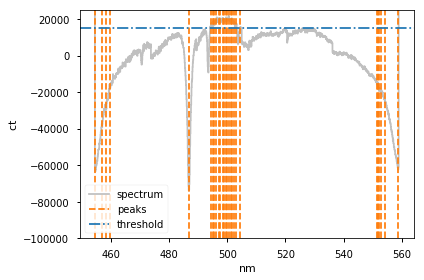

In [44]:
noise_region_star11 = specutils.SpectralRegion(620*u.nm, 635*u.nm)
spec_contsub_noiseest_star11 = noise_region_uncertainty(spec_contsub_star11, noise_region_star11)

# Find lines in the spectrum using derivatives and flux value
threshold_star11 = 15000 # Choose this threshold based on your own spectrum
lines_star11 = find_lines_derivative(spec_contsub_noiseest_star11, flux_threshold=threshold_star11) 
print(lines_star11)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star11.wavelength.to(u.nm), spec_contsub_noiseest_star11.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star11['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star11, color='C0', ls='-.', label='threshold')     
plt.ylim(-100000,25000)
plt.legend()
plt.tight_layout()

   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
454.66473577294516 absorption                 2
 455.3622480805337 absorption                10
455.88538231122504 absorption                16
457.19321788795355 absorption                31
 457.7163521186449 absorption                37
463.64520673314735 absorption               105
 486.8374909604655 absorption               371
 558.7684476805315 absorption              1196


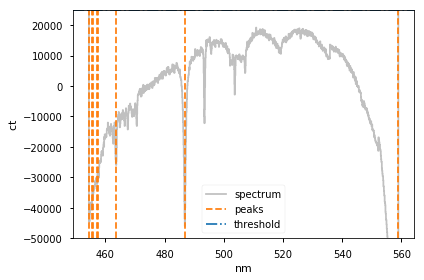

In [54]:
noise_region_star12 = specutils.SpectralRegion(625*u.nm, 638*u.nm)
spec_contsub_noiseest_star12 = noise_region_uncertainty(spec_contsub_star12, noise_region_star12)

# Find lines in the spectrum using derivatives and flux value
threshold_star12 = 25000 # Choose this threshold based on your own spectrum
lines_star12 = find_lines_derivative(spec_contsub_noiseest_star12, flux_threshold=threshold_star12) 
print(lines_star12)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star12.wavelength.to(u.nm), spec_contsub_noiseest_star12.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star12['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star12, color='C0', ls='-.', label='threshold')     
plt.ylim(-50000,25000)
plt.legend()
plt.tight_layout()

   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
 495.1204496130792   emission               466
495.55639480532204   emission               471
495.99233999756484   emission               476
497.38736461274186   emission               492
 498.6080111510218   emission               506
499.21833442016174   emission               513
501.65962749672155   emission               541
 521.1027830707515   emission               764
 521.7131063398914   emission               771
 522.3234296090313   emission               778
               ...        ...               ...
 528.6882294157766   emission               851
 530.4320101847479   emission               871
 455.3622480805337 absorption                10
 456.2341384650193 absorption                20
458.32667538778486 absorption                44
459.63451096451337 absorption                59
470.53314077058394 absorption           

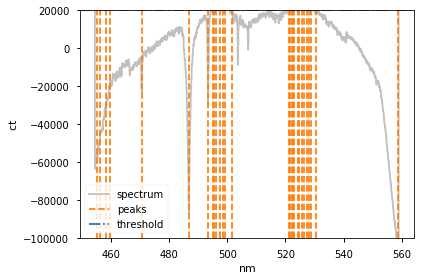

In [46]:
noise_region_star12_companion = specutils.SpectralRegion(625*u.nm, 638*u.nm)
spec_contsub_noiseest_star12_companion = noise_region_uncertainty(spec_contsub_star12_companion, noise_region_star12_companion)

# Find lines in the spectrum using derivatives and flux value
threshold_star12_companion = 20000 # Choose this threshold based on your own spectrum
lines_star12_companion = find_lines_derivative(spec_contsub_noiseest_star12_companion, flux_threshold=threshold_star12_companion) 
print(lines_star12_companion)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star12_companion.wavelength.to(u.nm), spec_contsub_noiseest_star12_companion.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star12_companion['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star12_companion, color='C0', ls='-.', label='threshold')     
plt.ylim(-100000,20000)
plt.legend()
plt.tight_layout()


   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
 490.8481867290995   emission               417
 491.4585099982395   emission               424
 492.3304003827251   emission               434
494.24855922859354   emission               456
 495.1204496130792   emission               466
 496.0795290360134   emission               477
 496.6026632667048   emission               483
 497.6489317280876   emission               495
 498.5208221125732   emission               505
499.21833442016174   emission               513
               ...        ...               ...
 550.5726780663664 absorption              1102
 551.3573794124035 absorption              1111
 551.7061355661976 absorption              1115
 552.2292697968891 absorption              1121
 552.5780259506834 absorption              1125
 553.1011601813748 absorption              1131
  553.449916335169 absorption           

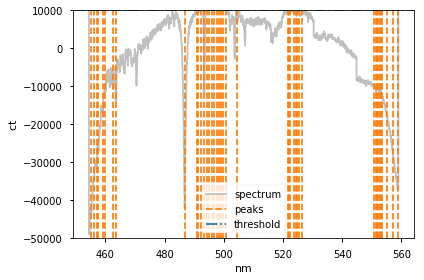

In [47]:
noise_region_star13 = specutils.SpectralRegion(625*u.nm, 638*u.nm)
spec_contsub_noiseest_star13 = noise_region_uncertainty(spec_contsub_star13, noise_region_star13)

# Find lines in the spectrum using derivatives and flux value
threshold_star13 = 10000 # Choose this threshold based on your own spectrum
lines_star13 = find_lines_derivative(spec_contsub_noiseest_star13, flux_threshold=threshold_star13) 
print(lines_star13)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star13.wavelength.to(u.nm), spec_contsub_noiseest_star13.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star13['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star13, color='C0', ls='-.', label='threshold')     
plt.ylim(-50000,10000)
plt.legend()
plt.tight_layout()

   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
455.18787000363653 absorption                 8
 457.0188398110564 absorption                29
457.62916308019635 absorption                36
 458.2394863493363 absorption                43
  486.750301922017 absorption               370
 558.7684476805315 absorption              1196


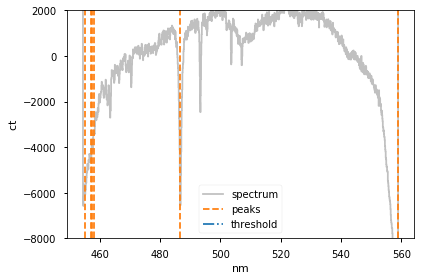

In [48]:
noise_region_star14 = specutils.SpectralRegion(625*u.nm, 638*u.nm)
spec_contsub_noiseest_star14 = noise_region_uncertainty(spec_contsub_star14, noise_region_star14)

# Find lines in the spectrum using derivatives and flux value
threshold_star14 = 3000 # Choose this threshold based on your own spectrum
lines_star14 = find_lines_derivative(spec_contsub_noiseest_star14, flux_threshold=threshold_star14) 
print(lines_star14)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star14.wavelength.to(u.nm), spec_contsub_noiseest_star14.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star14['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star14, color='C0', ls='-.', label='threshold')     
plt.ylim(-8000,2000)
plt.legend()
plt.tight_layout()

   line_center     line_type  line_center_index
        nm                                     
------------------ ---------- -----------------
454.66473577294516 absorption                 2
 486.9246799989141 absorption               372
 558.7684476805315 absorption              1196


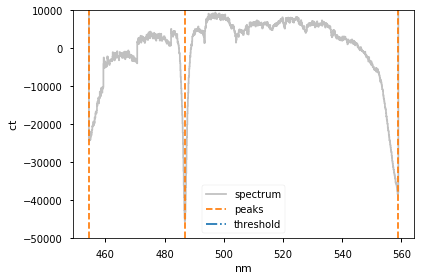

In [49]:
noise_region_star15 = specutils.SpectralRegion(600*u.nm, 625*u.nm)
spec_contsub_noiseest_star15 = noise_region_uncertainty(spec_contsub_star15, noise_region_star15)

# Find lines in the spectrum using derivatives and flux value
threshold_star15 = 20000 # Choose this threshold based on your own spectrum
lines_star15 = find_lines_derivative(spec_contsub_noiseest_star15, flux_threshold=threshold_star15) 
print(lines_star15)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star15.wavelength.to(u.nm), spec_contsub_noiseest_star15.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star15['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star15, color='C0', ls='-.', label='threshold')     
plt.ylim(-50000,10000)
plt.legend()
plt.tight_layout()

   line_center    line_type  line_center_index
        nm                                    
----------------- ---------- -----------------
486.8374909604655 absorption               371
558.3325024882886 absorption              1191


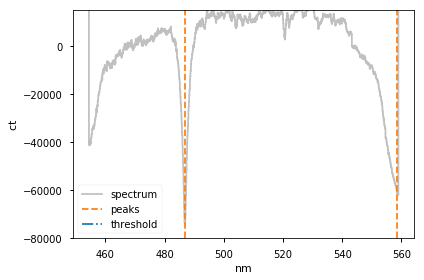

In [50]:
noise_region_star15_companion = specutils.SpectralRegion(600*u.nm, 625*u.nm)
spec_contsub_noiseest_star15_companion = noise_region_uncertainty(spec_contsub_star15_companion, noise_region_star15_companion)

# Find lines in the spectrum using derivatives and flux value
threshold_star15_companion = 40000 # Choose this threshold based on your own spectrum
lines_star15_companion = find_lines_derivative(spec_contsub_noiseest_star15_companion, flux_threshold=threshold_star15_companion) 
print(lines_star15_companion)

# Plot the spectrum, threshold, and detected lines
plt.step(spec_contsub_noiseest_star15_companion.wavelength.to(u.nm), spec_contsub_noiseest_star15_companion.flux, 
         color='silver', label='spectrum')
labeled = False
for j in lines_star15_companion['line_center']:
    j = j.value
    if not labeled:
        plt.axvline(j, ymin=0, color='C1', ls='--', label='peaks')
        labeled=True
    else:
        plt.axvline(j, color='C1', ls='--')
plt.axhline(threshold_star15_companion, color='C0', ls='-.', label='threshold')     
plt.ylim(-80000,15000)
plt.legend()
plt.tight_layout()
